<h1>IAU fáza 2.</h1>
Maria Fedosenya (50%) a Jakub Grúber (50%)

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
from sklearn.preprocessing import FunctionTransformer
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from matplotlib import pyplot
from collections import Counter
from datetime import datetime, date
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, PowerTransformer,QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

pd.set_option('display.max_columns', 25) #nastavené kvôli sessions.csv, ktoré má 25 stĺpcov, aby sa dali všetky prezrieť

<h2>Načítanie dát z fázy 1</h2>
Originálne dáta sú uložené v priečinku data/origin, dáta upravené v rámci prvej fázy sú v priečinku data/phase_1

In [241]:
sessions_path = "./data/phase_1/session.csv"
users_path = "./data/phase_1/user.csv"
products_path = "./data/phase_1/product.csv"

In [242]:
products = pd.read_csv(products_path)
products.head()

,code,location,store_name,product_ean
0,RU,Europe/Moscow,Kashira,8840337777778
1,SK,Europe/Bratislava,Skalica,9613080891331
2,PH,Asia/Manila,Antipolo,8545276183603
3,PK,Asia/Karachi,Larkana,9999281937499
4,CN,Asia/Shanghai,Hushitai,1423598805373


In [243]:
users = pd.read_csv(users_path)
users.head()

,sex,user_id,current_location,address,job,name,race,mail,username,registration,birthdate,age
0,M,1270.0,"(Decimal('43.6199585'), Decimal('-39.027502'))",Samova 235 750 67 Police nad Metuji,Lawyer,MUDr. Premysl Riha,NaN,stastnyrostislav@seznam.cz,ales00,2023-08-23,1981-08-08,42.0
1,F,146.0,"(Decimal('67.5016935'), Decimal('169.135745'))",Doringstr. 1/8 09217 Stassfurt,Augenoptiker,Verena Zirme,NaN,marinaschueler@aol.de,schweitzertoni,2022-07-02,2010-09-15,13.0
2,NaN,2178.0,"(Decimal('-83.0843785'), Decimal('35.417096'))","Stretto Surian, 1 Appartamento 5 09071, Abbasa...",NaN,Sabatino Salvemini,NaN,alberto76@virgilio.it,rviviani,2017-10-26,1957-07-10,66.0
3,NaN,1211.0,"(Decimal('85.896300'), Decimal('-141.411207'))",Gang Shan Xian Wo Sun Zi Shi Shang Guang Gu 4D...,NaN,Qing Mu Ren,NaN,nishimuraasuka@yahoo.com,fmatsumoto,2020-02-22,1961-03-02,62.0
4,F,1678.0,"(Decimal('71.468916'), Decimal('-69.232181'))",USS Nelson FPO AE 34617,NaN,Vicki Lopez,NaN,ghowell@yahoo.com,nreed,2022-02-14,NaN,NaN


In [244]:
sessions = pd.read_csv(sessions_path)
sessions.head()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,4142933212429,41.07557,1080,53.33923,10.65208,0.00646,116.78143,5.44105,2021-05-11 10:16:37,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,6554259262213,52.52006,1080,69.70571,8.32826,0.07267,134.68835,9.51278,2023-07-07 17:38:03,9.48454,56.71155,30.83474,103955,1186
2,41.66225,800,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,3525947927861,38.74596,768,72.87642,10.18567,0.02227,126.47138,8.10733,2019-07-24 12:15:27,9.51528,58.17433,39.30398,731099,1265
3,37.59937,800,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,9631384503705,62.74747,600,54.03365,7.75790,0.05988,263.06076,9.31265,2022-06-10 17:52:37,4.91020,68.47422,46.14026,1379903,467
4,62.70254,1920,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,2238487280389,41.10241,600,60.07533,7.59956,1.45341,146.88323,12.60862,2020-09-07 15:03:13,10.63283,28.45915,42.41093,691237,594


<h1>Integrácia a čistenie dát</h1>

Predtým, ako začneme dáta čistiť si ich potrebujeme previesť na numerické hodnoty.

V datasete products máme veľa unique hodnôt, ktoré by nemalo zmysel prevádzať na číselné hodnoty.

Pokračujeme teda datasetom users:

Tu v stĺpci sex máme len dve hodnoty M alebo F (muž alebo žena). Tieto teda vieme reprezentovať ako 1 - muž a 0 - žena

In [245]:
users_numeric = users.copy()

try:
    users_numeric['sex'] = users_numeric['sex'].str.replace('M', "1")
    users_numeric['sex'] = users_numeric['sex'].str.replace('F', "0")
    users_numeric = users_numeric.assign(sex = pd.to_numeric(users_numeric['sex']))
except:
    print("Data is already of type number")

Ďaľší atribút, ktorý vieme previesť na číselné hodnoty je atribút race

In [246]:
users_numeric['race'].unique()

array([nan, 'white', 'indian', 'black', 'asian'], dtype=object)

Keďže máme 4 unikátne typy rás, vieme ich reprezentovať nasledovne:
<ul>
<li>White - 1
<li>indian - 2
<li>black - 3
<li>asian - 4
</ul>

In [247]:
try:
    users_numeric['race'] = users_numeric['race'].str.replace("white", "1")
    users_numeric['race'] = users_numeric['race'].str.replace("indian", "2")
    users_numeric['race'] = users_numeric['race'].str.replace("black", "3")
    users_numeric['race'] = users_numeric['race'].str.replace("asian", "4") 
    users_numeric = users_numeric.assign(race = pd.to_numeric(users_numeric['race']))
except:
    print("Data is already of type number")

Atribúty registraction a birthdate vieme upraviť na číslo vhodné pre machine learning nasledovne:

In [248]:
users_numeric = users_numeric.assign(registration = pd.to_datetime(users_numeric['registration']))
users_numeric['registration'] = (users_numeric['registration'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [249]:
users_numeric = users_numeric.assign(birthdate = pd.to_datetime(users_numeric['birthdate']))
users_numeric['birthdate'] = (users_numeric['birthdate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

Ostatné atribúty, ktoré nevieme previesť na čísla z datasetu odstránime

In [250]:
users_numeric = users_numeric.drop(['current_location', 'address', 'job', 'name', 'mail', 'username'], axis=1)

In [251]:
users_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1268 non-null   float64
 1   user_id       2540 non-null   float64
 2   race          537 non-null    float64
 3   registration  2540 non-null   float64
 4   birthdate     1375 non-null   float64
 5   age           1375 non-null   float64
dtypes: float64(6)
memory usage: 121.4 KB


In [252]:
users_numeric.head()

,sex,user_id,race,registration,birthdate,age
0,1.0,1270.0,NaN,1.692749e+09,3.660768e+08,42.0
1,0.0,146.0,NaN,1.656720e+09,1.284509e+09,13.0
2,NaN,2178.0,NaN,1.508976e+09,-3.938112e+08,66.0
3,NaN,1211.0,NaN,1.582330e+09,-2.788128e+08,62.0
4,0.0,1678.0,NaN,1.644797e+09,NaN,NaN


Ako posledný ideme upravovať dataset sessions:

In [253]:
sessions_numeric = sessions.copy()

sessions_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move                 10912 non-null  float64
 1   screen_width                    10912 non-null  int64  
 2   ack                             10912 non-null  float64
 3   pct_mouse_move                  10912 non-null  float64
 4   scroll_move_total_rel_distance  10912 non-null  float64
 5   page_activity_duration          10912 non-null  float64
 6   pct_doubleclick                 10912 non-null  float64
 7   pct_click                       10912 non-null  float64
 8   total_load_time                 10912 non-null  float64
 9   mouse_move_total_rel_distance   10912 non-null  float64
 10  product_ean                     10912 non-null  int64  
 11  pct_click_product_info          10912 non-null  float64
 12  screen_height                   

Vyzerá, že jediným atribútom, ktorý nemá číselnú podobu je session_start. Upravíme ho podobne ako registration a birthdate z users:

In [254]:
sessions_numeric = sessions_numeric.assign(session_start = pd.to_datetime(sessions_numeric['session_start']))
sessions_numeric['session_start'] = (sessions_numeric['session_start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [255]:
sessions_numeric.head()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,4142933212429,41.07557,1080,53.33923,10.65208,0.00646,116.78143,5.44105,1620728197,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,6554259262213,52.52006,1080,69.70571,8.32826,0.07267,134.68835,9.51278,1688751483,9.48454,56.71155,30.83474,103955,1186
2,41.66225,800,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,3525947927861,38.74596,768,72.87642,10.18567,0.02227,126.47138,8.10733,1563970527,9.51528,58.17433,39.30398,731099,1265
3,37.59937,800,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,9631384503705,62.74747,600,54.03365,7.75790,0.05988,263.06076,9.31265,1654883557,4.91020,68.47422,46.14026,1379903,467
4,62.70254,1920,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,2238487280389,41.10241,600,60.07533,7.59956,1.45341,146.88323,12.60862,1599490993,10.63283,28.45915,42.41093,691237,594


<h3>Chýbajúce hodnoty (missing values)</h3>
V predchádzajúcej fáze sme chýbajúce hodnoty v datasete sessions skúsili nahradiť priemerom. Teraz skúsime inú metódu a skúsime ich nahradiť pomocou lineárnej regresie (KNN). Na to si ale musíme načítať pôvodný dataset, nakoľko v tejto fáze už pracujeme s upravenými dátami oproti pôvodným:

In [256]:
sess_filepath = "data/origin/session.csv"
sessions_test = pd.read_csv(sess_filepath, sep='\t') #dataframe for sessions to try other methods of missing values replacement
sessions_test.head()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,browser_name,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,4142933212429,41.07557,chrome,1080,53.33923,10.65208,0.00646,116.78143,5.44105,2021-05-11 10:16:37,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,6554259262213,52.52006,chrome,1080,69.70571,8.32826,0.07267,134.68835,9.51278,2023-07-07 17:38:03,9.48454,56.71155,30.83474,103955,1186
2,41.66225,lower,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,3525947927861,38.74596,edge,768,72.87642,10.18567,0.02227,126.47138,8.10733,2019-07-24 12:15:27,9.51528,58.17433,39.30398,731099,1265
3,37.59937,lower,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,9631384503705,62.74747,safari,600,54.03365,7.75790,0.05988,263.06076,9.31265,2022-06-10 17:52:37,4.91020,68.47422,46.14026,1379903,467
4,62.70254,higher,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,2238487280389,41.10241,edge,600,60.07533,7.59956,1.45341,146.88323,12.60862,2020-09-07 15:03:13,10.63283,28.45915,42.41093,691237,594


In [257]:
sessions_test = sessions_test.drop_duplicates()
sessions__test_duplicates = sessions_test[sessions_test.duplicated()]
len(sessions__test_duplicates)

0

In [258]:
def set_screen_width(sw):
    if sw == "lower" :
        return 800
    elif sw == "higher":
        return 1920
    else:
        return sw
    
def set_screen_height(sh):
    if sh == "lower" :
        return 600
    elif sh == "higher":
        return 1080
    else:
        return sh
    
sessions_test['screen_width'] = sessions_test['screen_width'].apply(set_screen_width)
sessions_test['screen_height'] = sessions_test['screen_height'].apply(set_screen_height)

sessions_test = sessions_test.drop(["browser_name"], axis=1)

In [259]:
sessions.head()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,4142933212429,41.07557,1080,53.33923,10.65208,0.00646,116.78143,5.44105,2021-05-11 10:16:37,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,6554259262213,52.52006,1080,69.70571,8.32826,0.07267,134.68835,9.51278,2023-07-07 17:38:03,9.48454,56.71155,30.83474,103955,1186
2,41.66225,800,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,3525947927861,38.74596,768,72.87642,10.18567,0.02227,126.47138,8.10733,2019-07-24 12:15:27,9.51528,58.17433,39.30398,731099,1265
3,37.59937,800,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,9631384503705,62.74747,600,54.03365,7.75790,0.05988,263.06076,9.31265,2022-06-10 17:52:37,4.91020,68.47422,46.14026,1379903,467
4,62.70254,1920,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,2238487280389,41.10241,600,60.07533,7.59956,1.45341,146.88323,12.60862,2020-09-07 15:03:13,10.63283,28.45915,42.41093,691237,594


In [260]:
columns = ["pct_scroll_move", "pct_mouse_move", "scroll_move_total_rel_distance", "page_activity_duration", "pct_doubleclick", "pct_click", "total_load_time", "mouse_move_total_rel_distance", "pct_click_product_info", "pct_wild_mouse", "pct_mouse_click", "pct_input", "session_duration", "wild_mouse_duration", "pct_scroll_move_duration", "pct_scrandom", "pct_rage_click"]
 
for i, column in enumerate(columns):
 n_miss = sessions_test[column].isnull().sum()
 perc = n_miss / sessions_test.shape[0] * 100
 print('%s %d (%.1f%%)' % (column, n_miss, perc))

pct_scroll_move 11 (0.1%)
pct_mouse_move 11 (0.1%)
scroll_move_total_rel_distance 11 (0.1%)
page_activity_duration 11 (0.1%)
pct_doubleclick 11 (0.1%)
pct_click 11 (0.1%)
total_load_time 0 (0.0%)
mouse_move_total_rel_distance 11 (0.1%)
pct_click_product_info 11 (0.1%)
pct_wild_mouse 11 (0.1%)
pct_mouse_click 11 (0.1%)
pct_input 11 (0.1%)
session_duration 0 (0.0%)
wild_mouse_duration 11 (0.1%)
pct_scroll_move_duration 11 (0.1%)
pct_scrandom 11 (0.1%)
pct_rage_click 11 (0.1%)


In [261]:
sessions_test = sessions_test.assign(session_start = pd.to_datetime(sessions_test['session_start']))
sessions_test['session_start'] = (sessions_test['session_start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

sessions_test_knn = sessions_test.copy()
data = sessions_test_knn.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

print('Missing: %d' % sum(pd.isna(X).flatten()))
imputer = KNNImputer()
imputer.fit(X)
Xtrans = imputer.transform(X)

print('Missing: %d \n' % sum(pd.isna(Xtrans).flatten()))

sessions_test_knn.info()

Missing: 165
Missing: 0 

<class 'pandas.core.frame.DataFrame'>
Index: 10912 entries, 0 to 11042
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move                 10901 non-null  float64
 1   screen_width                    10912 non-null  object 
 2   ack                             10912 non-null  float64
 3   pct_mouse_move                  10901 non-null  float64
 4   scroll_move_total_rel_distance  10901 non-null  float64
 5   page_activity_duration          10901 non-null  float64
 6   pct_doubleclick                 10901 non-null  float64
 7   pct_click                       10901 non-null  float64
 8   total_load_time                 10912 non-null  float64
 9   mouse_move_total_rel_distance   10901 non-null  float64
 10  product_ean                     10912 non-null  int64  
 11  pct_click_product_info          10901 non-null  float64
 12  screen_heig

In [262]:
sessions_test_knn.head(20)

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
0,44.92257,1366,1.0,8.79303,11.16238,5.45167,9.31170,10.35168,2.81337,7.79215,4142933212429,41.07557,1080,53.33923,10.65208,0.00646,116.78143,5.44105,1620728197,11.39851,60.96280,42.77314,1126926,2369
1,53.93169,1280,0.0,10.69797,13.20789,8.03161,11.33962,7.58887,0.11913,13.78957,6554259262213,52.52006,1080,69.70571,8.32826,0.07267,134.68835,9.51278,1688751483,9.48454,56.71155,30.83474,103955,1186
2,41.66225,800,1.0,11.45911,9.16087,7.73080,9.19028,8.11378,2.60292,5.95620,3525947927861,38.74596,768,72.87642,10.18567,0.02227,126.47138,8.10733,1563970527,9.51528,58.17433,39.30398,731099,1265
3,37.59937,800,1.0,9.78386,6.38416,9.70961,7.42759,6.54811,6.55699,6.36864,9631384503705,62.74747,600,54.03365,7.75790,0.05988,263.06076,9.31265,1654883557,4.91020,68.47422,46.14026,1379903,467
4,62.70254,1920,0.0,7.39008,6.09215,11.10614,10.94899,8.45322,0.85335,7.94163,2238487280389,41.10241,600,60.07533,7.59956,1.45341,146.88323,12.60862,1599490993,10.63283,28.45915,42.41093,691237,594
5,61.97286,1280,1.0,10.35223,5.75549,11.34581,6.57972,8.46953,4.14889,8.12832,1925267512228,32.17758,1080,53.84368,7.63618,0.66407,36.55669,11.81931,1611628018,7.86493,44.47547,31.27958,287548,98
6,37.95096,1280,0.0,7.44280,8.10008,10.43996,10.59187,8.61040,8.01728,8.13228,2703564692855,58.30562,600,55.99896,9.14538,0.13232,98.09171,10.14409,1659846611,11.22587,44.07244,33.52938,940408,1863
7,55.21370,800,1.0,9.43712,12.39561,6.35263,13.35800,8.59864,2.18870,8.09075,7291805451972,44.94427,600,54.95659,10.20664,0.01555,215.02259,7.40475,1546486781,13.31740,57.61754,39.41398,825526,1660
8,28.24404,1024,1.0,8.50688,10.82101,8.99179,11.15291,8.95374,3.24996,8.77909,3735846340948,43.06530,600,12.09002,10.54170,0.02515,205.55848,8.14649,1664976144,11.95009,28.93209,57.22930,261236,1491
9,65.33764,1024,0.0,9.62676,10.04908,7.22268,9.88599,9.36052,4.25322,10.13167,6642253975717,63.40218,800,64.24569,7.26089,0.05369,138.49897,9.22675,1562145044,9.81558,38.27188,60.19783,208595,1631


In [263]:
#Ked dam run all, tak sa tam vypisu tie missing values, ked to runnem znovu, uz tam nie su???
sessions_test_knn.isnull().sum()

pct_scroll_move                   11
screen_width                       0
ack                                0
pct_mouse_move                    11
scroll_move_total_rel_distance    11
page_activity_duration            11
pct_doubleclick                   11
pct_click                         11
total_load_time                    0
mouse_move_total_rel_distance     11
product_ean                        0
pct_click_product_info            11
screen_height                      0
pct_wild_mouse                    11
pct_mouse_click                   11
pct_input                         11
session_duration                   0
wild_mouse_duration               11
session_start                      0
pct_scroll_move_duration          11
pct_scrandom                      11
pct_rage_click                    11
session_id                         0
user_id                            0
dtype: int64

Pre dataset sessions ešte vyskúšame chýbajúce hodnoty nahradiť mediánom:

In [264]:
for i, column in enumerate(columns):
 n_miss = sessions_test[column].isnull().sum()
 perc = n_miss / sessions_test.shape[0] * 100
 print('%s %d (%.1f%%)' % (column, n_miss, perc))

pct_scroll_move 11 (0.1%)
pct_mouse_move 11 (0.1%)
scroll_move_total_rel_distance 11 (0.1%)
page_activity_duration 11 (0.1%)
pct_doubleclick 11 (0.1%)
pct_click 11 (0.1%)
total_load_time 0 (0.0%)
mouse_move_total_rel_distance 11 (0.1%)
pct_click_product_info 11 (0.1%)
pct_wild_mouse 11 (0.1%)
pct_mouse_click 11 (0.1%)
pct_input 11 (0.1%)
session_duration 0 (0.0%)
wild_mouse_duration 11 (0.1%)
pct_scroll_move_duration 11 (0.1%)
pct_scrandom 11 (0.1%)
pct_rage_click 11 (0.1%)


In [265]:
sessions_test_median = sessions_test.copy()

pct_scroll_move_mean = sessions_test_median.pct_scroll_move.median()
sessions_test_median.pct_scroll_move = sessions_test_median.pct_scroll_move.fillna(pct_scroll_move_mean)

pct_mouse_move_mean = sessions_test_median.pct_mouse_move.median()
sessions_test_median.pct_mouse_move = sessions_test_median.pct_mouse_move.fillna(pct_mouse_move_mean)

scroll_move_total_rel_distance_mean = sessions_test_median.scroll_move_total_rel_distance.median()
sessions_test_median.scroll_move_total_rel_distance = sessions_test_median.scroll_move_total_rel_distance.fillna(scroll_move_total_rel_distance_mean)

page_activity_duration_mean = sessions_test_median.page_activity_duration.median()
sessions_test_median.page_activity_duration = sessions_test_median.page_activity_duration.fillna(page_activity_duration_mean)

pct_doubleclick_mean = sessions_test_median.pct_doubleclick.median()
sessions_test_median.pct_doubleclick  = sessions_test_median.pct_doubleclick.fillna(pct_doubleclick_mean)

pct_click_mean = sessions_test_median.pct_click .median()
sessions_test_median.pct_click = sessions_test_median.pct_click.fillna(pct_click_mean)

mouse_move_total_rel_distance_mean = sessions_test_median.mouse_move_total_rel_distance .median()
sessions_test_median.mouse_move_total_rel_distance = sessions_test_median.mouse_move_total_rel_distance.fillna(mouse_move_total_rel_distance_mean)

pct_click_product_info_mean = sessions_test_median.pct_click_product_info .median()
sessions_test_median.pct_click_product_info = sessions_test_median.pct_click_product_info.fillna(pct_click_product_info_mean)

pct_wild_mouse_mean = sessions_test_median.pct_wild_mouse.median()
sessions_test_median.pct_wild_mouse = sessions_test_median.pct_wild_mouse.fillna(pct_wild_mouse_mean)

pct_mouse_click_mean = sessions_test_median.pct_mouse_click.median()
sessions_test_median.pct_mouse_click = sessions_test_median.pct_mouse_click.fillna(pct_mouse_click_mean)

pct_input_mean = sessions_test_median.pct_input.median()
sessions_test_median.pct_input = sessions_test_median.pct_input.fillna(pct_input_mean)

wild_mouse_duration_mean = sessions_test_median.wild_mouse_duration.median()
sessions_test_median.wild_mouse_duration= sessions_test_median.wild_mouse_duration.fillna(wild_mouse_duration_mean)

pct_scroll_move_duration_mean = sessions_test_median.pct_scroll_move_duration.median()
sessions_test_median.pct_scroll_move_duration = sessions_test_median.pct_scroll_move_duration.fillna(pct_scroll_move_duration_mean)

pct_scrandom_mean = sessions_test_median.pct_scrandom.median()
sessions_test_median.pct_scrandom = sessions_test_median.pct_scrandom.fillna(pct_scrandom_mean)

pct_rage_click_mean = sessions_test_median.pct_rage_click.median()
sessions_test_median.pct_rage_click = sessions_test_median.pct_rage_click.fillna(pct_rage_click_mean)

In [266]:
sessions_test_median.isnull().sum()

pct_scroll_move                   0
screen_width                      0
ack                               0
pct_mouse_move                    0
scroll_move_total_rel_distance    0
page_activity_duration            0
pct_doubleclick                   0
pct_click                         0
total_load_time                   0
mouse_move_total_rel_distance     0
product_ean                       0
pct_click_product_info            0
screen_height                     0
pct_wild_mouse                    0
pct_mouse_click                   0
pct_input                         0
session_duration                  0
wild_mouse_duration               0
session_start                     0
pct_scroll_move_duration          0
pct_scrandom                      0
pct_rage_click                    0
session_id                        0
user_id                           0
dtype: int64

Ďaľším riešením problému chýbajúcich dát by moholo byť odstránenie chýbajúcich hodnôt:

Dataset users

In [267]:
users_test = users.copy()
print(users_test.shape)

(2588, 12)


In [268]:
users_test.dropna(inplace=True)
print(users_test.shape)

(45, 12)


Pri datasete users to spôsobí, že sú odstránené skoro všetky pozorovania, tak túto by nebolo vhodné použt na vyriešenie chýbajúcich hodnôt.

Dataset products:

In [269]:
products_test = products.copy()
print(products_test.shape)

(14912, 4)


In [270]:
products_test.dropna(inplace=True)
print(products_test.shape)

(14900, 4)


Pri datasete products tento spôsob môžeme zvážiť, nakoľko neprídeme až o toľko záznamov

Dataset sessions:

In [271]:
print(sessions_test.shape)

(10912, 24)


In [272]:
sessions_test.dropna(inplace=True)
print(sessions_test.shape)

(10748, 24)


Aj pri datasete sessions môžeme zvážiť vymazanie záznamov s NaN hodnotami

<h3>Vychýlené hodnoty (outliers detection)</h3>
Najviac podstatných číselných údajov sa nachádza v rámci datasetu sessions. Najprv si prejdeme jednotlive stĺpce a nahradíme vychýlené údaje hraničnými hodnotami rozdelenia - zvolili sme <b>1%</b> a pre dolné ohraničenie a <b>99%</b> pre horné, lebo pri 5% a 95% percentách dochádzalo k veľkej koncentráci hodnôt na hraniciach.
Pre vizualizáciu porovnáme histoploty pred a po čistení. 

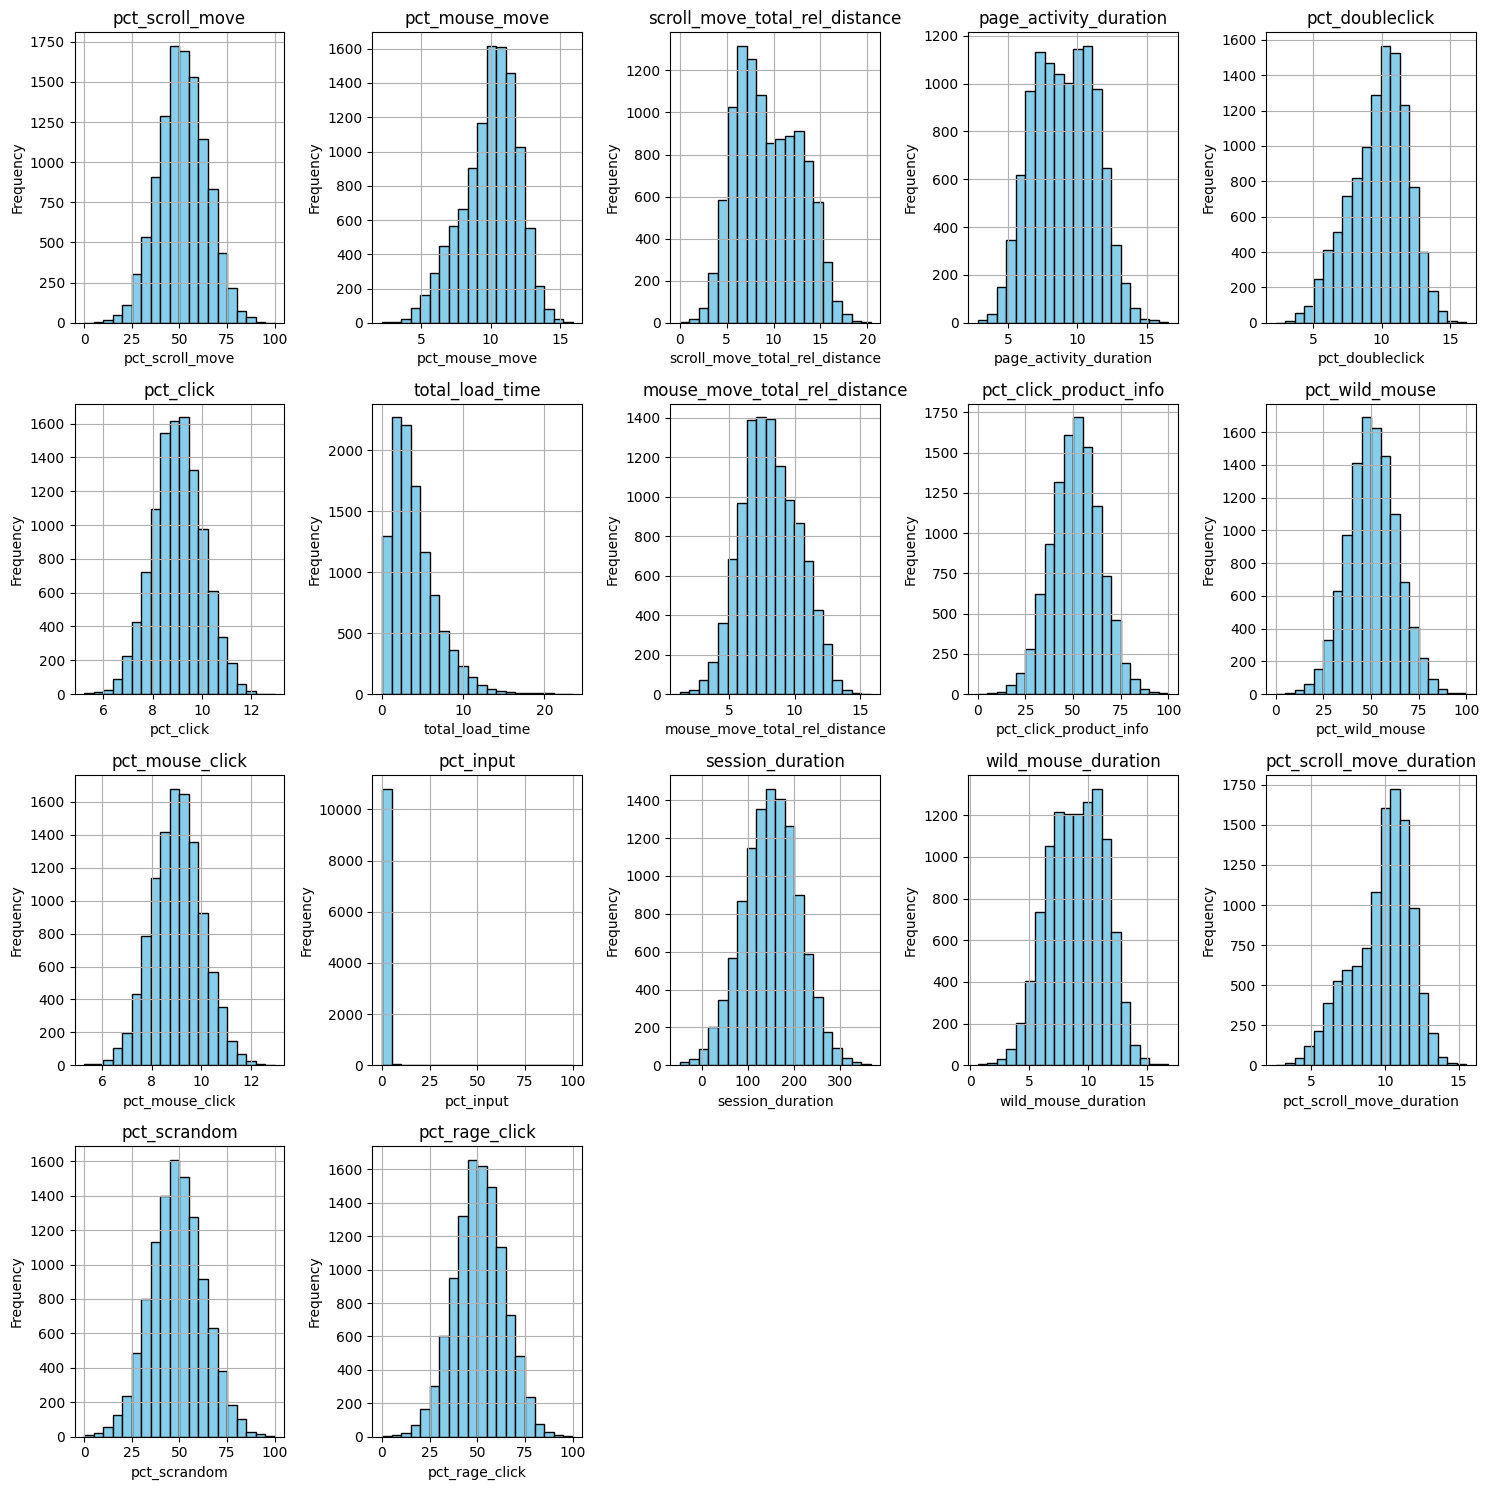

In [273]:
num_columns = len(columns)
num_rows = int(np.ceil(num_columns / 5))
num_cols = min(5, num_columns) 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()

for i, column_name in enumerate(columns):
    axs[i].hist(sessions[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [274]:
sessions.describe()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
count,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000
mean,51.597911,1298.397177,0.549487,9.958976,9.436445,9.045979,9.794251,9.009388,3.984017,8.116084,4.976500e+12,51.341515,847.465543,50.732776,9.035542,0.385997,150.156130,9.026392,9.801486,48.814895,51.156387,7.477409e+05,1253.488087
std,12.582861,414.606975,0.497568,1.994431,3.366636,2.199447,2.079046,1.001372,2.817457,2.143902,2.896585e+12,12.703651,187.388238,12.939001,1.001076,1.990747,60.380152,2.338910,1.960188,13.832647,13.008655,4.323119e+05,723.414795
min,0.000000,800.000000,0.000000,2.165200,0.000000,2.812950,2.268070,5.214400,0.003570,1.228680,1.234528e+09,0.000000,600.000000,0.000000,5.272990,0.000000,-47.247120,0.648860,2.587140,0.000000,0.000000,1.249000e+03,0.000000
25%,43.257508,1024.000000,0.000000,8.755600,6.727070,7.306475,8.404263,8.342427,1.913255,6.595477,2.488811e+12,42.755845,768.000000,42.062085,8.357748,0.014160,109.037757,7.261398,8.613705,39.476125,42.562180,3.696938e+05,628.000000
50%,51.501845,1280.000000,1.000000,10.227655,9.023465,9.046640,10.060755,9.012640,3.339890,7.982980,4.968606e+12,51.322265,800.000000,50.542360,9.040600,0.051680,151.104965,9.131100,10.177305,48.811852,51.067095,7.519230e+05,1255.000000
75%,60.090293,1920.000000,1.000000,11.381730,12.183375,10.748287,11.279898,9.679443,5.354380,9.645398,7.482085e+12,59.871335,1080.000000,59.287085,9.705095,0.251232,190.967010,10.824608,11.195362,57.847328,59.887293,1.121014e+06,1880.000000
max,100.000000,1920.000000,1.000000,15.912470,20.349730,16.572150,16.180380,12.943650,23.487790,15.791510,9.997623e+12,100.000000,1080.000000,100.000000,12.965960,100.000000,366.445590,16.845850,15.529330,100.000000,100.000000,1.499931e+06,2499.000000


In [275]:
for column in columns:
    lower = sessions[column].quantile(0.01)
    higher = sessions[column].quantile(0.99)

    sessions[column] = sessions[column].apply(lambda x: lower if (x < lower) else higher if (x > higher) else x)

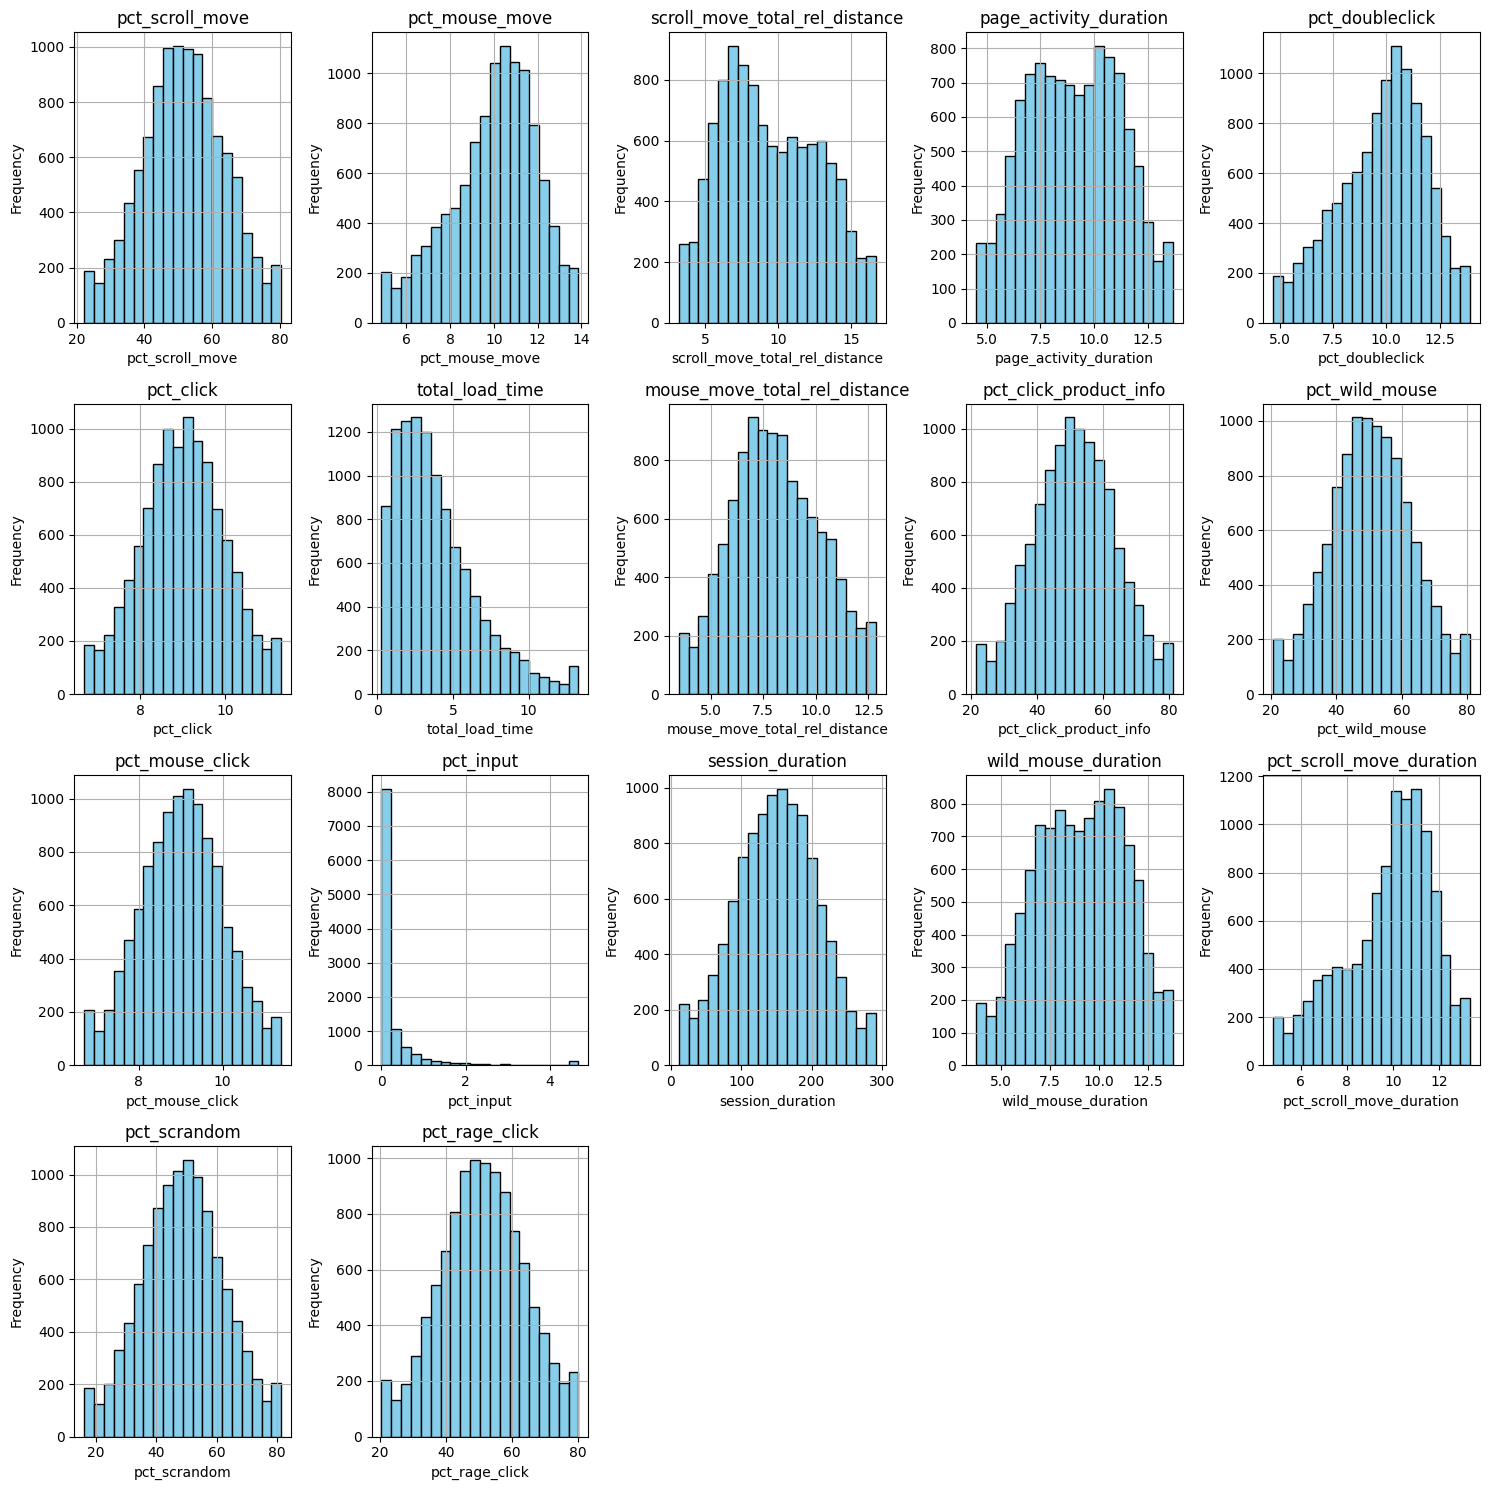

In [276]:
num_columns = len(columns)
num_rows = int(np.ceil(num_columns / 5))
num_cols = min(5, num_columns) 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()

for i, column_name in enumerate(columns):
    axs[i].hist(sessions[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [277]:
sessions.describe()

,pct_scroll_move,screen_width,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,screen_height,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
count,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000
mean,51.594917,1298.397177,0.549487,9.959533,9.435246,9.042378,9.795359,9.010031,3.960801,8.116079,4.976500e+12,51.340235,847.465543,50.731397,9.035455,0.306044,150.135585,9.027459,9.801606,48.816609,51.153963,7.477409e+05,1253.488087
std,12.332506,414.606975,0.497568,1.969259,3.333233,2.171710,2.054206,0.985643,2.715800,2.115439,2.896585e+12,12.479225,187.388238,12.692580,0.983672,0.698842,59.366255,2.301635,1.933533,13.617304,12.765770,4.323119e+05,723.414795
min,22.208387,800.000000,0.000000,4.864950,3.164169,4.503068,4.701713,6.678065,0.279456,3.485567,1.234528e+09,21.497307,600.000000,20.632892,6.704577,0.004121,11.269987,3.732695,4.812080,16.073845,20.501649,1.249000e+03,0.000000
25%,43.257508,1024.000000,0.000000,8.755600,6.727070,7.306475,8.404263,8.342427,1.913255,6.595477,2.488811e+12,42.755845,768.000000,42.062085,8.357748,0.014160,109.037757,7.261398,8.613705,39.476125,42.562180,3.696938e+05,628.000000
50%,51.501845,1280.000000,1.000000,10.227655,9.023465,9.046640,10.060755,9.012640,3.339890,7.982980,4.968606e+12,51.322265,800.000000,50.542360,9.040600,0.051680,151.104965,9.131100,10.177305,48.811852,51.067095,7.519230e+05,1255.000000
75%,60.090293,1920.000000,1.000000,11.381730,12.183375,10.748287,11.279898,9.679443,5.354380,9.645398,7.482085e+12,59.871335,1080.000000,59.287085,9.705095,0.251232,190.967010,10.824608,11.195362,57.847328,59.887293,1.121014e+06,1880.000000
max,80.412053,1920.000000,1.000000,13.866308,16.662361,13.660763,13.929914,11.319384,13.288524,12.849171,9.997623e+12,81.118102,1080.000000,80.883925,11.397359,4.679090,291.033489,13.782217,13.352144,81.432869,80.188227,1.499931e+06,2499.000000


S sessions.describe() vidíme, že po tomto čistení sa nam v niektorých prípadoch zmenili min a max hodnoty pre niektoré sĺpce - teda došlo k odstráneniu/nahradeniu výchyliek. Trochu sa posunuli priemery, ale rozdelenia nam ostali rovnaké.

Teraz ešte môžeme skúsiť outlierov odstrániť a pozrieť sa, ako bude vyzerať výsledný dataset. Pri odstraňovaní použijeme hranice 5% a 95% percent a hodnoty za týmito hranicami odstránime:

In [278]:
session_test_out_drop = sessions_test.copy()

session_test_out_drop.describe()

,pct_scroll_move,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
count,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,1.074800e+04,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,1.074800e+04,10748.000000,10748.000000,10748.000000,1.074800e+04,10748.000000
mean,51.621241,0.549777,9.961318,9.443796,9.042292,9.797642,9.007676,3.980967,8.119535,4.984735e+12,51.347635,50.713369,9.034537,0.387973,150.111406,9.026120,1.616662e+09,9.805509,48.826123,51.148224,7.472435e+05,1252.680127
std,12.604536,0.497539,1.994567,3.366707,2.202649,2.080856,1.001727,2.818126,2.147411,2.897695e+12,12.716100,12.925951,1.001203,2.004966,60.459558,2.339266,4.539015e+07,1.961024,13.860989,13.005513,4.326662e+05,723.070051
min,0.000000,0.000000,2.165200,0.000000,2.812950,2.268070,5.214400,0.003570,1.228680,1.234528e+09,0.000000,0.000000,5.272990,0.000000,-47.247120,0.648860,1.537696e+09,2.587140,0.000000,0.000000,1.249000e+03,0.000000
25%,43.265098,0.000000,8.763448,6.738333,7.299475,8.404848,8.341732,1.909233,6.597717,2.496424e+12,42.757655,42.019420,8.356220,0.014095,108.860533,7.256168,1.577450e+09,8.614865,39.465562,42.549657,3.685118e+05,624.000000
50%,51.513265,1.000000,10.234095,9.034645,9.046140,10.066095,9.013240,3.336395,7.985295,4.979525e+12,51.317490,50.515095,9.039850,0.051205,151.081595,9.128955,1.617250e+09,10.180760,48.822325,51.047920,7.513835e+05,1254.000000
75%,60.107530,1.000000,11.382248,12.194995,10.748207,11.286070,9.676678,5.352380,9.653987,7.499176e+12,59.881825,59.278415,9.705030,0.249717,190.977958,10.826460,1.656032e+09,11.197340,57.873320,59.901880,1.121014e+06,1879.000000
max,100.000000,1.000000,15.912470,20.349730,16.572150,16.180380,12.943650,23.487790,15.791510,9.997623e+12,100.000000,100.000000,12.965960,100.000000,366.445590,16.845850,1.695450e+09,15.529330,100.000000,100.000000,1.499931e+06,2499.000000


In [279]:
for column in columns:
    lower = session_test_out_drop[column].quantile(0.05)
    higher = session_test_out_drop[column].quantile(0.95)

    session_test_out_drop = session_test_out_drop[(session_test_out_drop[column] >= lower) & (session_test_out_drop[column] <= higher)]

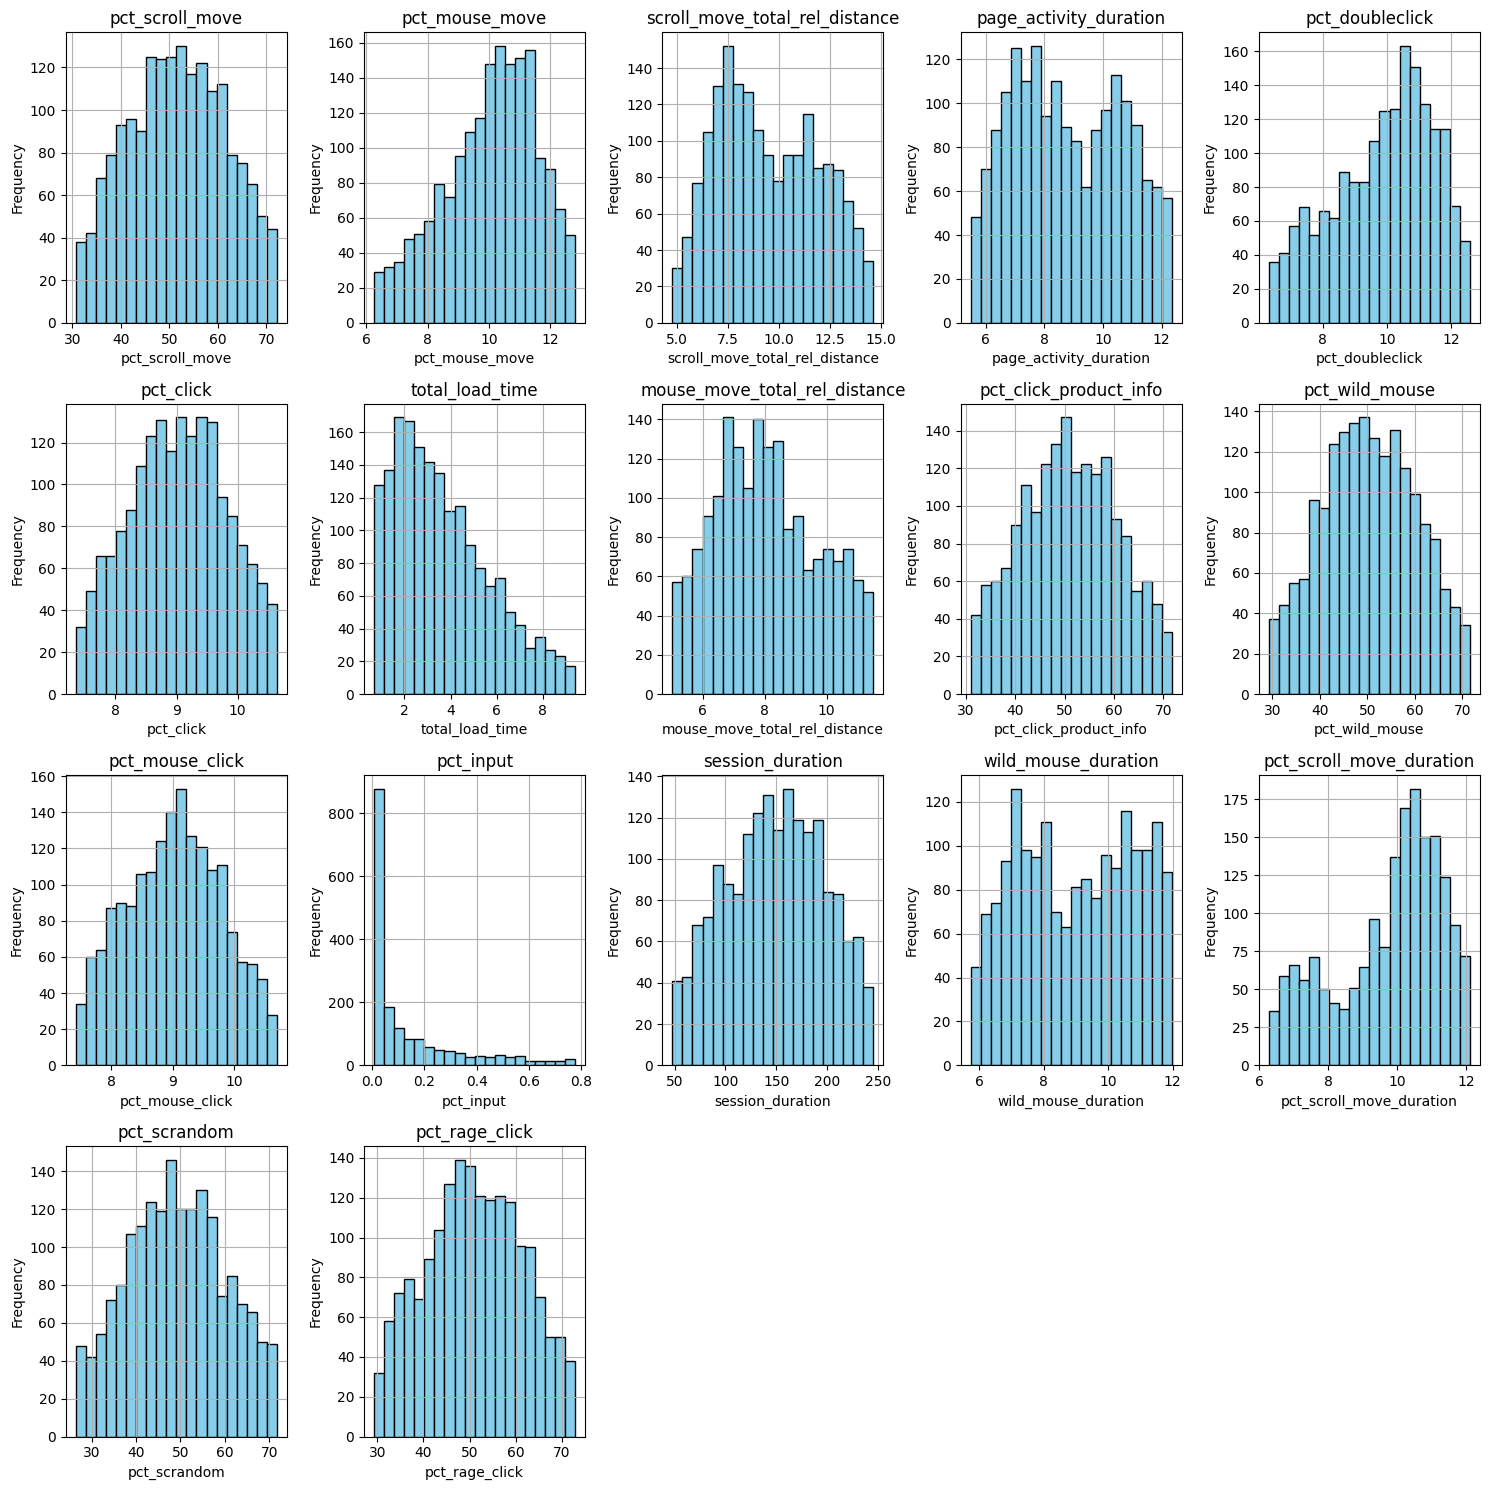

In [280]:
num_columns = len(columns)
num_rows = int(np.ceil(num_columns / 5))
num_cols = min(5, num_columns) 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()

for i, column_name in enumerate(columns):
    axs[i].hist(session_test_out_drop[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [281]:
session_test_out_drop.describe()

,pct_scroll_move,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,product_ean,pct_click_product_info,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,session_start,pct_scroll_move_duration,pct_scrandom,pct_rage_click,session_id,user_id
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1.783000e+03,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1.783000e+03,1783.000000,1783.000000,1783.000000,1.783000e+03,1783.000000
mean,51.638767,0.568704,10.029683,9.475623,8.801467,9.883352,9.025856,3.683396,8.079943,4.977342e+12,51.009982,50.394729,9.024293,0.140478,148.487563,9.003606,1.618421e+09,9.766662,49.147113,51.032157,7.676402e+05,1238.321929
std,10.040497,0.495396,1.518595,2.470251,1.845212,1.559703,0.787934,2.060000,1.655237,2.872551e+12,9.727543,9.883949,0.773917,0.183755,48.204779,1.770230,4.553821e+07,1.528083,10.920713,10.412814,4.307272e+05,715.001758
min,30.748790,0.000000,6.251020,4.777960,5.480200,6.328690,7.352140,0.685340,5.021880,1.278655e+10,30.947410,29.254070,7.419560,0.007400,47.892550,5.736470,1.537986e+09,6.286790,26.466410,29.309930,1.370000e+03,0.000000
25%,44.073650,0.000000,9.041770,7.416455,7.216790,8.777610,8.433570,2.034835,6.787965,2.470787e+12,43.585520,43.134750,8.441715,0.015300,111.124025,7.404485,1.579127e+09,8.754045,41.087320,43.463590,4.079925e+05,620.500000
50%,51.747050,1.000000,10.219160,9.149810,8.609290,10.136040,9.038170,3.284190,7.929490,4.996253e+12,50.849710,50.175890,9.048470,0.049130,148.646170,9.067010,1.619729e+09,10.165760,48.897760,50.833630,7.735850e+05,1227.000000
75%,59.414605,1.000000,11.184405,11.505450,10.421785,11.114040,9.611900,5.003755,9.304420,7.441757e+12,58.296380,57.891630,9.598800,0.194155,186.138890,10.569775,1.658502e+09,10.937335,56.834200,58.876895,1.142087e+06,1856.000000
max,72.174200,1.000000,12.815490,14.633730,12.341130,12.587980,10.641710,9.398860,11.512930,9.993825e+12,71.725910,71.590980,10.693940,0.775720,245.482810,11.972390,1.695315e+09,12.119890,71.681240,72.876000,1.499879e+06,2497.000000


Ako opäť môžeme vidieť, dátam sa opäť zmenili napr. hodnoty min a max, čo naznačuje ich oklieštenie.

<h2>User_id duplicita</h2>
Kvôli nekonzistentnosti medzi user_id v sessions a users nemôžeme tieto tabuľky spojiť (ako sme zistili v fáze 1, v users sa niektoré ID opakujú - nevieme jednoznačne priradiť záznamy medzi tymito tabuľkami).
Pozrieme sa na to bližšie.

In [282]:
duplicates_mask = users.duplicated(subset='user_id', keep=False)
duplicated_ids = users.loc[duplicates_mask, 'user_id'].unique()

print("Percento duplicitných ID: {:.2f}%" .format(len(duplicated_ids)/len(users)*100))


Percento duplicitných ID: 26.00%


Ak by sme chceli tabuľky sessions a users spojiť, jedným z riešení by bolo odstrániť záznamy s viacznačným ID z obidvoch tabuliek. Pozrieme sa, koľko riadkov by sme mudeli odstrániť zo sessions. Ak ten počet bude nízky, môžeme to zvážiť.

In [283]:
rows_with_duplicated_ids = sessions[sessions['user_id'].isin(duplicated_ids)]
print("Pocet zaznamov v session s duplicitnymi ID: ", len(rows_with_duplicated_ids))
print("Percento zaznamov, ktore by sme mali vymazat: {:.2f}%" .format(len(rows_with_duplicated_ids)/len(sessions)*100))

Pocet zaznamov v session s duplicitnymi ID:  2783
Percento zaznamov, ktore by sme mali vymazat: 25.50%


Nemôžeme odstrániť 1/4 dát, čiže túto možnosť zamietame a spájať tabuľky nebudeme. Ďalej teda budeme pokračovať len s datasetom sessions, ktorý obsahuje predikovanú premennú <b>ack</b>. Tomuto datasetu boli chýbajúce hodnoty doplnené strednou hodnotou, jeho atribúty boli prevedené na číselné hodnoty a vychýlené hodnoty boli riešené tak, že sme ich nahradili hraničnými hodnotami s dolnou hranicou %1 a hornou hranicou 99%.

In [284]:
sessions = sessions.assign(session_start = pd.to_datetime(sessions['session_start']))
sessions['session_start'] = (sessions['session_start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [285]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move                 10912 non-null  float64
 1   screen_width                    10912 non-null  int64  
 2   ack                             10912 non-null  float64
 3   pct_mouse_move                  10912 non-null  float64
 4   scroll_move_total_rel_distance  10912 non-null  float64
 5   page_activity_duration          10912 non-null  float64
 6   pct_doubleclick                 10912 non-null  float64
 7   pct_click                       10912 non-null  float64
 8   total_load_time                 10912 non-null  float64
 9   mouse_move_total_rel_distance   10912 non-null  float64
 10  product_ean                     10912 non-null  int64  
 11  pct_click_product_info          10912 non-null  float64
 12  screen_height                   

<h1>Realizácia predspracovania dát</h1>
Dataset sme sa rozhodli rozdeliť na trénovaciu a testovaciu množinu v pomere 1:3, teda 75% a 25%. Keďže prepojiť users a sessions sa nedá a products nemajú žiadné užitočné údaje pre nás, tak budeme trénovať model len na dátach z tabuľky sessions.

In [286]:
train_set, test_set = train_test_split(sessions, test_size=0.25)
print("Trenovaci dataset ma", len(train_set), "zaznamov.\nTestovaci dataset ma", len(test_set), "zaznamov.")

Trenovaci dataset ma 8184 zaznamov.
Testovaci dataset ma 2728 zaznamov.


Zaujímať nás budú tieto stĺpce:

In [287]:
train_cols = ["pct_scroll_move", "ack", "pct_mouse_move", "scroll_move_total_rel_distance", "page_activity_duration", "pct_doubleclick", "pct_click", "total_load_time", "mouse_move_total_rel_distance", "pct_click_product_info", "pct_wild_mouse", "pct_mouse_click", "pct_input", "session_duration", "wild_mouse_duration", "pct_scroll_move_duration", "pct_scrandom", "pct_rage_click"]

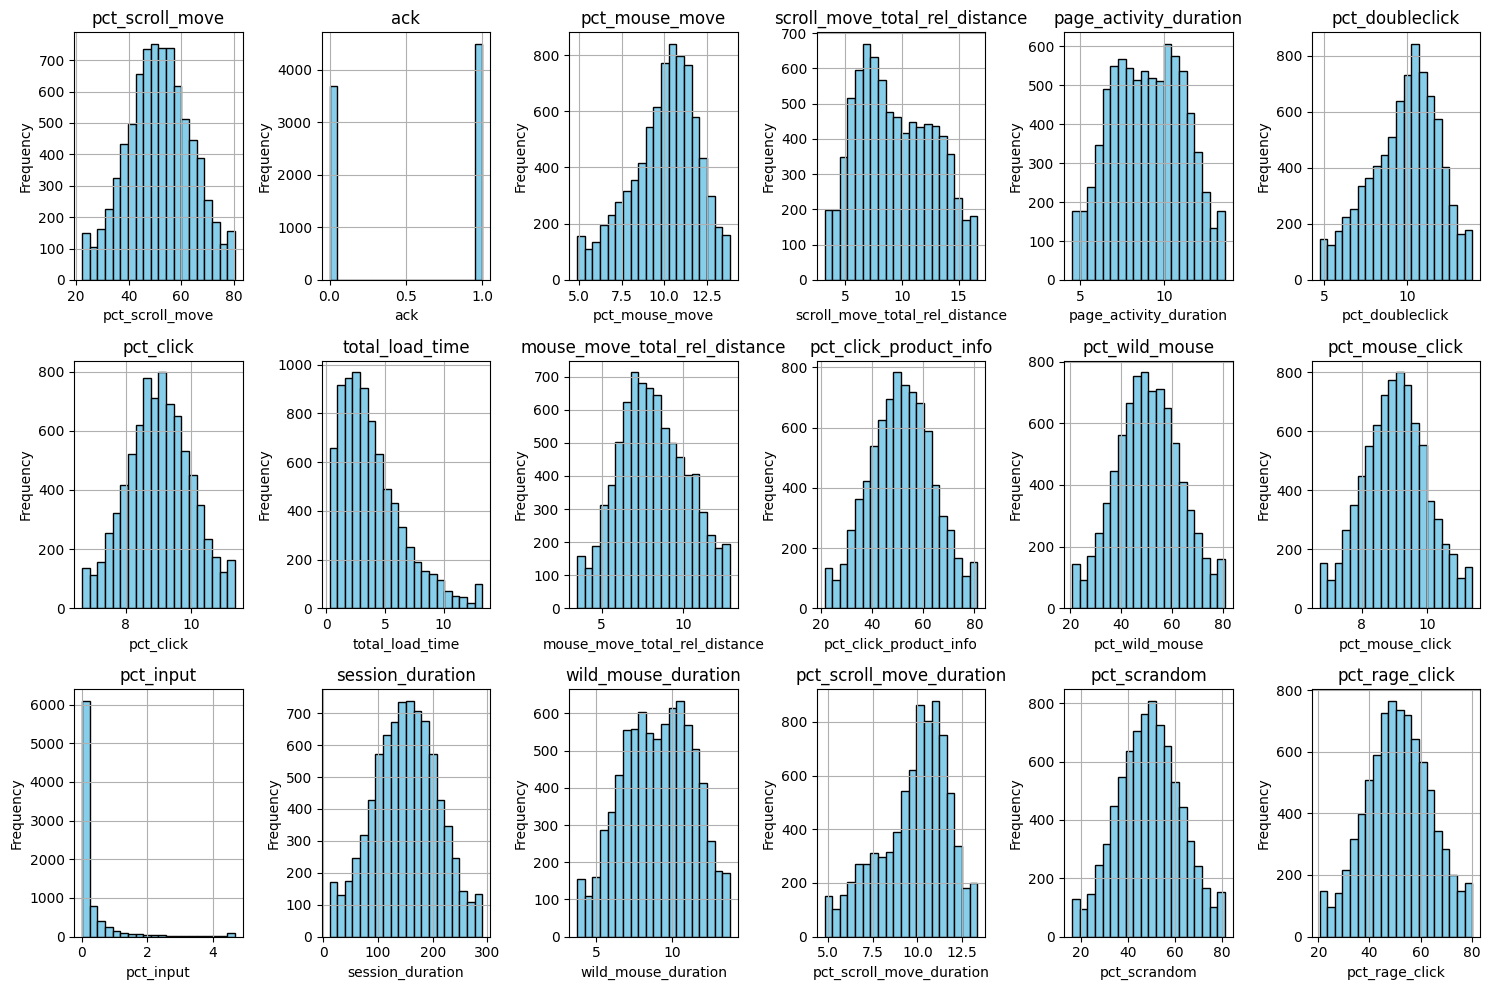

In [288]:
num_rows = 3
num_cols = 6

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 
axs = axs.flatten()

for i, column_name in enumerate(train_cols):
    axs[i].hist(train_set[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Pri Machine learningu dostávame lepšie výsledky, keď sa dáta približujú k normálnemu rozdeleniu. Preto sa teraz pozrieme, ktoré atribúty by mohli byť z normálneho rozdelenia

ShapiroResult(statistic=0.9957205057144165, pvalue=7.870289638642163e-15) 



c:\Users\fedos\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


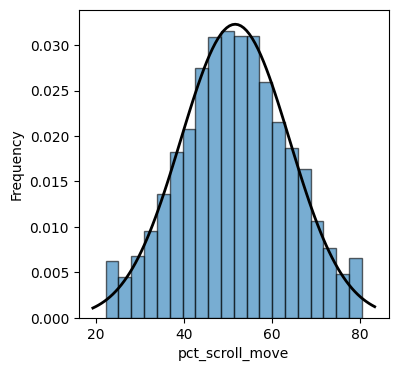

In [289]:
print(stats.shapiro(train_set['pct_scroll_move']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_scroll_move'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_scroll_move'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_scroll_move')
ax.set_ylabel('Frequency')

plt.show()

Premenná <b>ack</b> je kategorická, lebo má len dve hodnoty, buď 1 alebo 0 a tým pádom ju nie je potrebné upravovať

<Axes: >

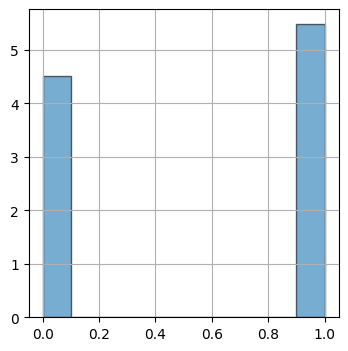

In [290]:
fig = plt.figure(figsize = (4,4))
ax = fig.gca()
train_set['ack'].hist(ax = ax, density=True, alpha=0.6, edgecolor='black')

ShapiroResult(statistic=0.9755843877792358, pvalue=3.642501417636582e-35) 



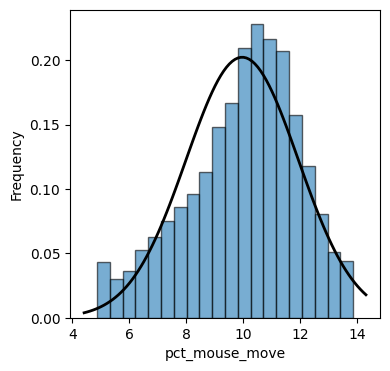

In [291]:
print(stats.shapiro(train_set['pct_mouse_move']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_mouse_move'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_mouse_move'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_mouse_move')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9714712500572205, pvalue=1.96132661086509e-37) 



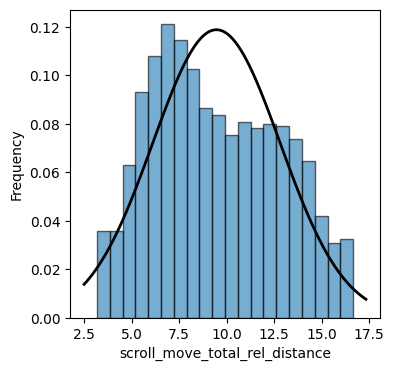

In [292]:
print(stats.shapiro(train_set['scroll_move_total_rel_distance']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['scroll_move_total_rel_distance'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['scroll_move_total_rel_distance'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('scroll_move_total_rel_distance')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9842921495437622, pvalue=3.8600595355127004e-29) 



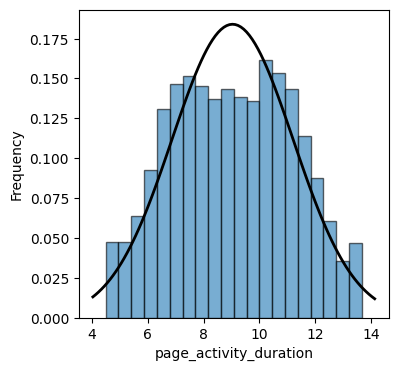

In [293]:
print(stats.shapiro(train_set['page_activity_duration']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['page_activity_duration'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['page_activity_duration'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('page_activity_duration')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9809519648551941, pvalue=1.0615072513702257e-31) 



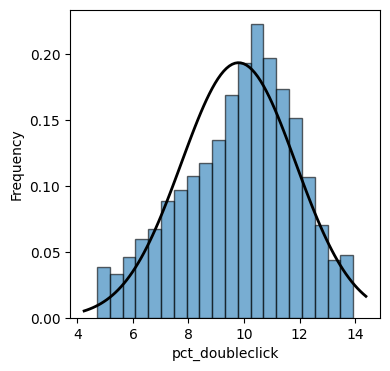

In [294]:
print(stats.shapiro(train_set['pct_doubleclick']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_doubleclick'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_doubleclick'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_doubleclick')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9958010315895081, pvalue=1.1666815822079183e-14) 



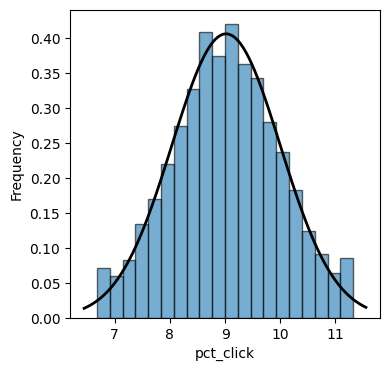

In [295]:
print(stats.shapiro(train_set['pct_click']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_click'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_click'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_click')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.911854088306427, pvalue=0.0) 



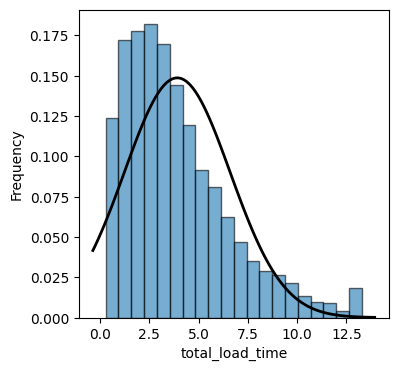

In [296]:
print(stats.shapiro(train_set['total_load_time']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['total_load_time'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['total_load_time'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('total_load_time')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9892597794532776, pvalue=2.009036835182722e-24) 



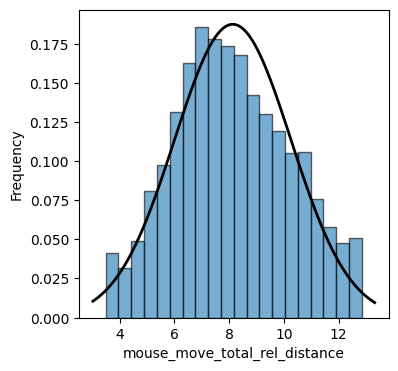

In [297]:
print(stats.shapiro(train_set['mouse_move_total_rel_distance']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['mouse_move_total_rel_distance'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['mouse_move_total_rel_distance'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('mouse_move_total_rel_distance')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9961146116256714, pvalue=5.67618258710649e-14) 



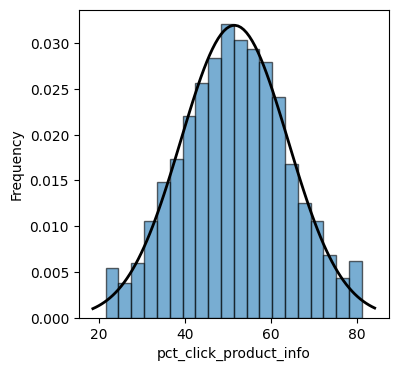

In [298]:
print(stats.shapiro(train_set['pct_click_product_info']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_click_product_info'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_click_product_info'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_click_product_info')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.995884358882904, pvalue=1.762396719989963e-14) 



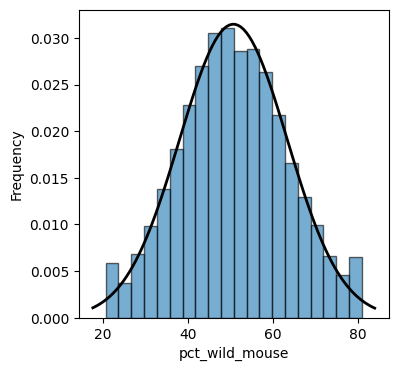

In [299]:
print(stats.shapiro(train_set['pct_wild_mouse']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_wild_mouse'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_wild_mouse'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_wild_mouse')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9960467219352722, pvalue=4.001386692147925e-14) 



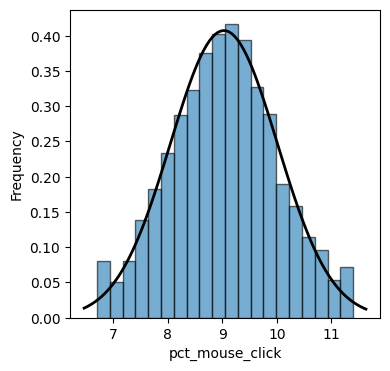

In [300]:
print(stats.shapiro(train_set['pct_mouse_click']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_mouse_click'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_mouse_click'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_mouse_click')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.457427442073822, pvalue=0.0) 



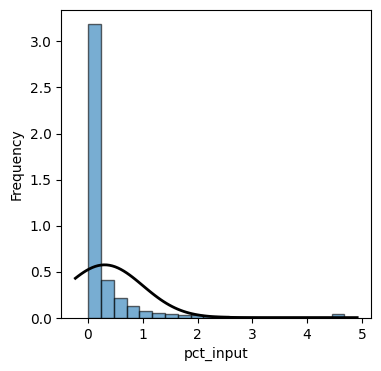

In [301]:
print(stats.shapiro(train_set['pct_input']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_input'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_input'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_input')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9954849481582642, pvalue=2.5580289127961463e-15) 



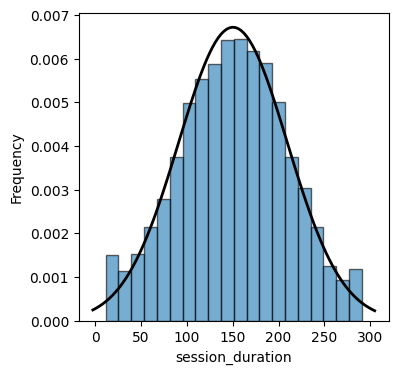

In [302]:
print(stats.shapiro(train_set['session_duration']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['session_duration'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['session_duration'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('session_duration')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9873608946800232, pvalue=2.1740923347717488e-26) 



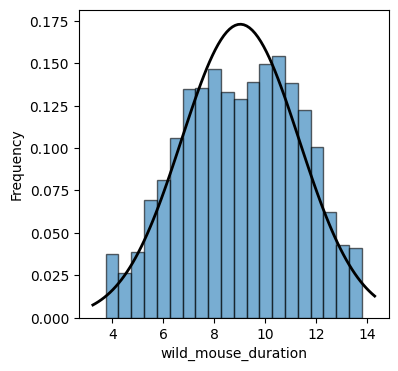

In [303]:
print(stats.shapiro(train_set['wild_mouse_duration']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['wild_mouse_duration'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['wild_mouse_duration'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('wild_mouse_duration')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9610041379928589, pvalue=3.265025421876824e-42) 



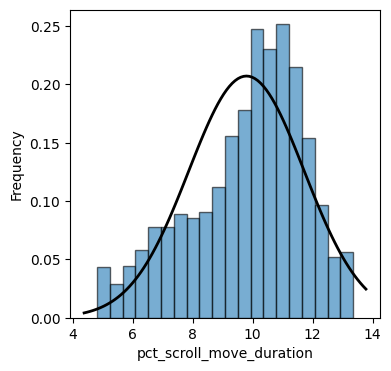

In [304]:
print(stats.shapiro(train_set['pct_scroll_move_duration']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_scroll_move_duration'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_scroll_move_duration'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_scroll_move_duration')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.9964057207107544, pvalue=2.661338217944259e-13) 



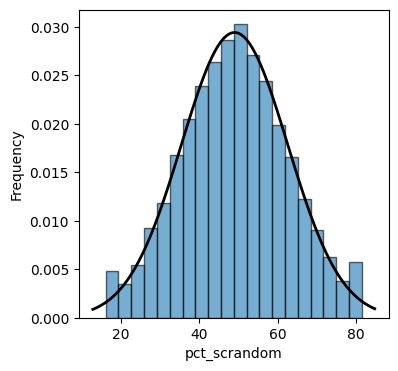

In [305]:
print(stats.shapiro(train_set['pct_scrandom']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_scrandom'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_scrandom'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_scrandom')
ax.set_ylabel('Frequency')

plt.show()

ShapiroResult(statistic=0.995358407497406, pvalue=1.4214919626315877e-15) 



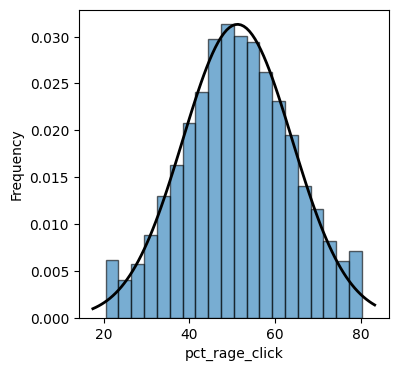

In [306]:
print(stats.shapiro(train_set['pct_rage_click']), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_rage_click'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_rage_click'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_rage_click')
ax.set_ylabel('Frequency')

plt.show()

Z predchádzajúcich testov a grafov sme dospeli k nasledovnému rozdeleniu distribúcií jednotlivých atribútov:

In [307]:
normal = ['pct_scroll_move', 'pct_mouse_move', 'scroll_move_total_rel_distance', 'page_activity_duration', 'pct_doubleclick', 'pct_click', 'mouse_move_total_rel_distance', 'pct_click_product_info', 'pct_wild_mouse', 'pct_mouse_click', 'session_duration', 'wild_mouse_duration', 'pct_scroll_move_duration', 'pct_scrandom', 'pct_rage_click']
skewed = ['total_load_time', 'pct_input']
categorical = ['ack']

Atribúty <b>total_load_time</b> a <b> pct_input</b> sú vychýlené, preto sa ich pokúsime quantilovou transformáciou priblížiť normálnemu rozdeleniu:

C:\Users\fedos\AppData\Local\Temp\ipykernel_18624\203632207.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set[skewed].hist(ax = ax, bins=50, density=True, alpha=0.6, edgecolor='black')


array([[<Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_input'}>]], dtype=object)

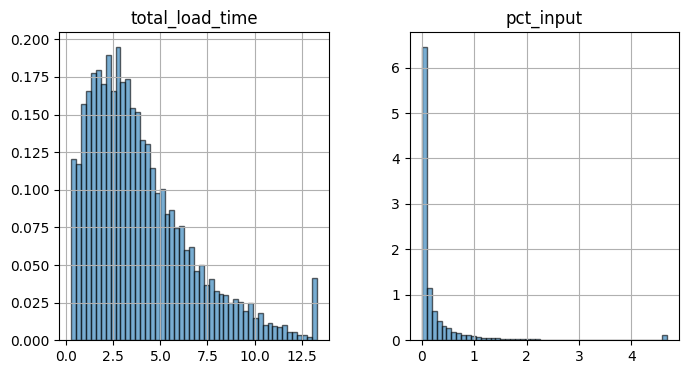

In [308]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
train_set[skewed].hist(ax = ax, bins=50, density=True, alpha=0.6, edgecolor='black')

C:\Users\fedos\AppData\Local\Temp\ipykernel_18624\2290829769.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set[skewed].hist(ax = ax, bins=50, density=True, alpha=0.6, edgecolor='black')


array([[<Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_input'}>]], dtype=object)

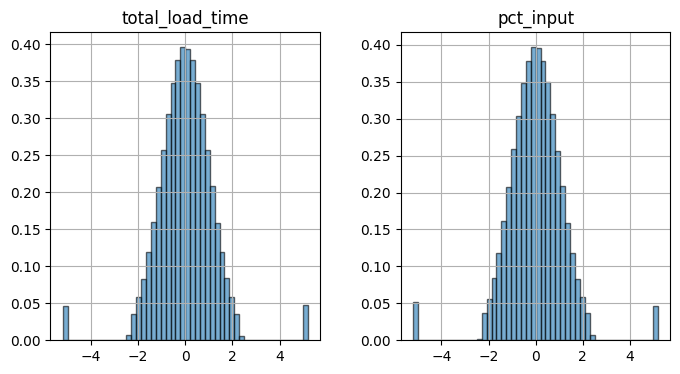

In [309]:
qt = QuantileTransformer(output_distribution="normal")
train_set[skewed] = qt.fit_transform(train_set[skewed])
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
train_set[skewed].hist(ax = ax, bins=50, density=True, alpha=0.6, edgecolor='black')

KstestResult(statistic=0.010874777810361905, pvalue=0.28572144546137335, statistic_location=-5.199337582605575, statistic_sign=1) 



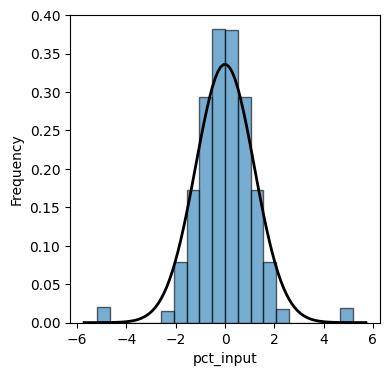

In [310]:
print(stats.kstest(train_set['pct_input'], 'norm'), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_input'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_input'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_input')
ax.set_ylabel('Frequency')

plt.show()

KstestResult(statistic=0.010019450342131253, pvalue=0.38143858864040414, statistic_location=5.19933758270342, statistic_sign=-1) 



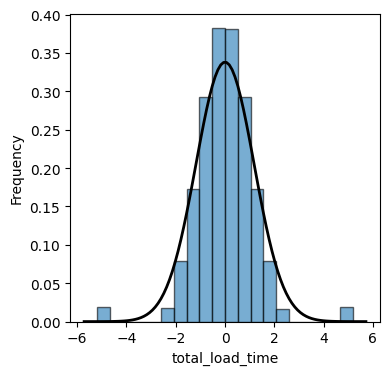

In [311]:
print(stats.kstest(train_set['total_load_time'], 'norm'), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['total_load_time'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['total_load_time'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('total_load_time')
ax.set_ylabel('Frequency')

plt.show()

Teraz dáta, ktoré vyzerajú, že by mohli byť z normálneho rozdelenia ešte transformujeme pomocou PowerTransformer, aby sa k nemu ešte lepšie priblížili

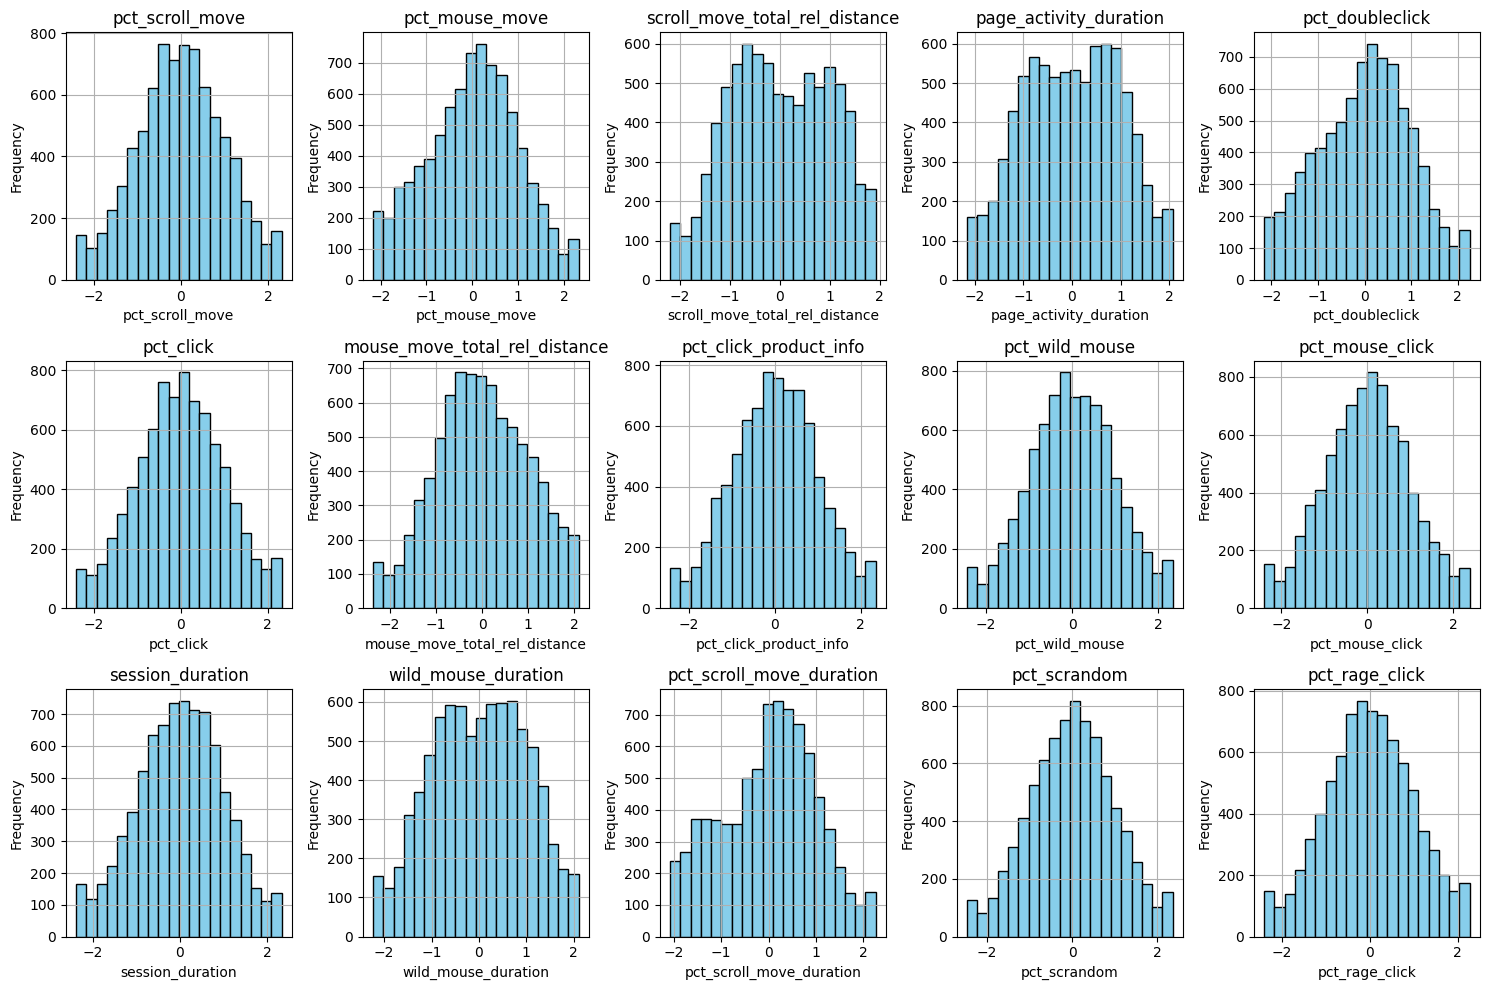

In [312]:
pt = PowerTransformer(method='yeo-johnson')
train_set[normal] = pt.fit_transform(train_set[normal])

num_rows = 3
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 
axs = axs.flatten()

for i, column_name in enumerate(normal):
    axs[i].hist(train_set[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

KstestResult(statistic=0.010097844645788445, pvalue=0.3718965639198494, statistic_location=2.322692280137843, statistic_sign=1) 



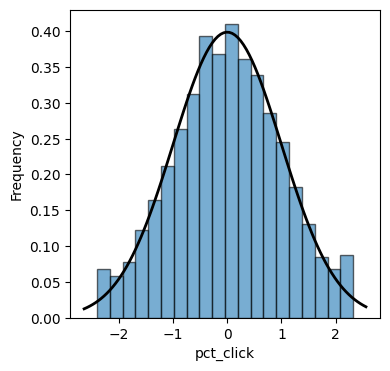

In [313]:
print(stats.kstest(train_set['pct_click'], 'norm'), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_click'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_click'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_click')
ax.set_ylabel('Frequency')

plt.show()

KstestResult(statistic=0.04289637382382769, pvalue=1.5966240110821237e-13, statistic_location=-1.187381325692239, statistic_sign=1)

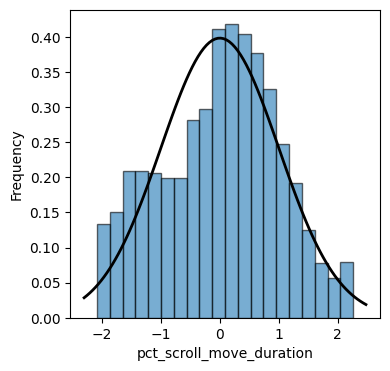

In [314]:
print(stats.kstest(train_set['pct_scroll_move_duration'], 'norm'), '\n')

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(train_set['pct_scroll_move_duration'], bins=20, density=True, alpha=0.6, edgecolor='black')

mu, std = stats.norm.fit(train_set['pct_scroll_move_duration'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

ax.set_xlabel('pct_scroll_move_duration')
ax.set_ylabel('Frequency')

plt.show()

Na príkladoch vidíme, že dáta sa viac blížia k normálnemu rozdeleniu ako predtým, než na nich bol aplikovaný PowerTransformer. Následne dáta ešte budeme škálovať:

In [315]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_set[normal+skewed] = scaler.fit_transform(train_set[normal+skewed])

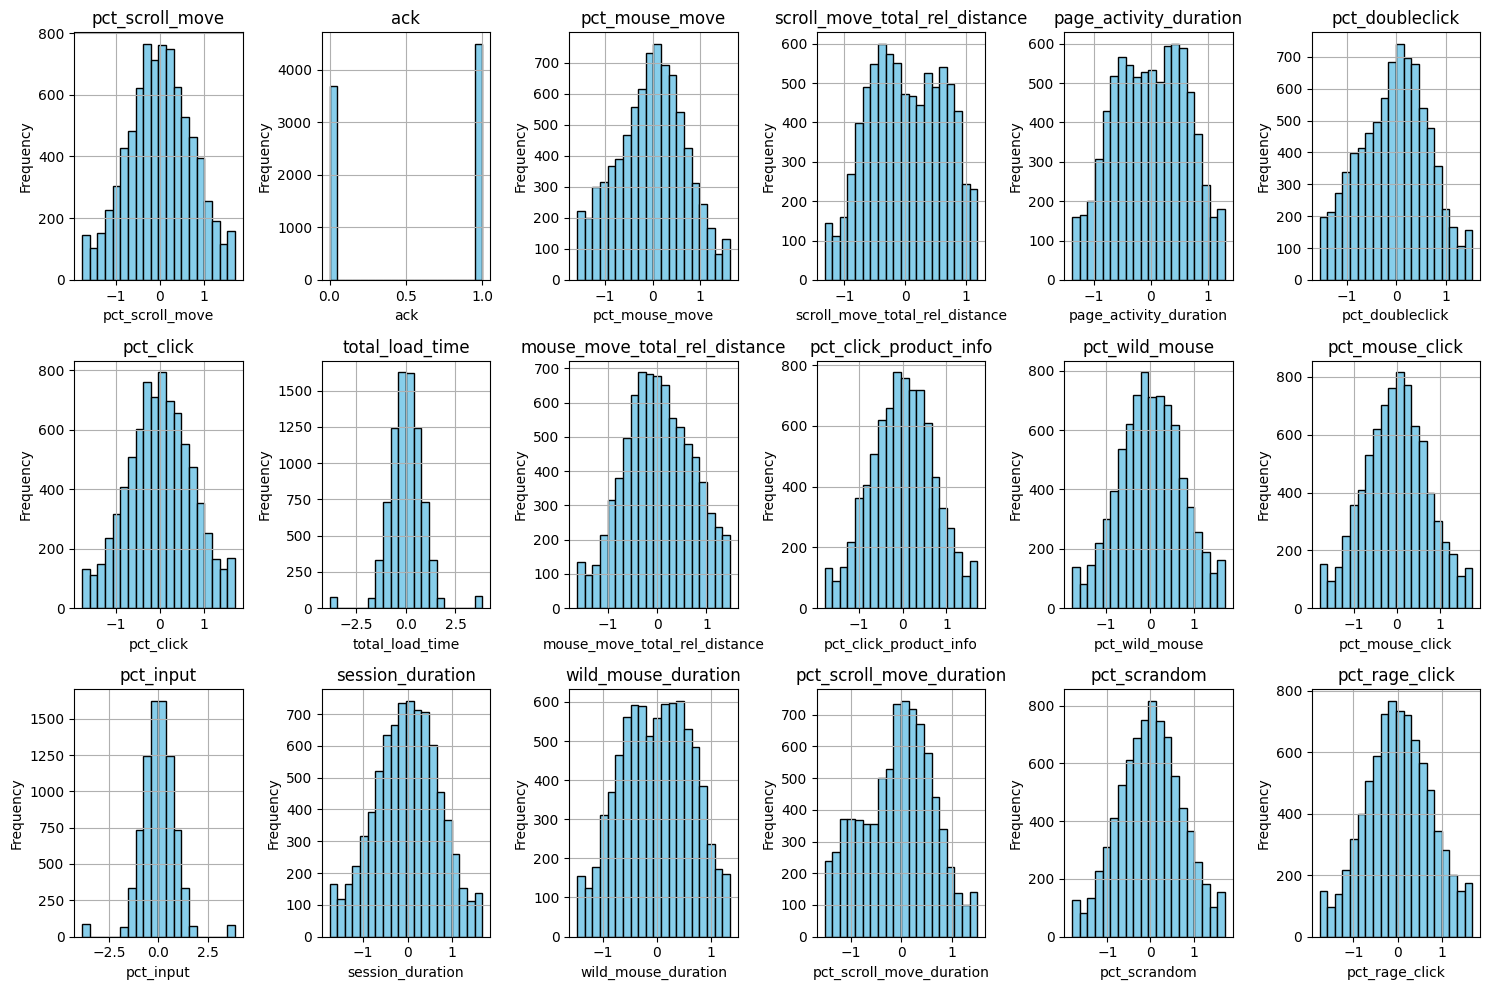

In [316]:
num_rows = 3
num_cols = 6

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 
axs = axs.flatten()

for i, column_name in enumerate(train_cols):
    axs[i].hist(train_set[column_name], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column_name)
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [317]:
train_set[train_cols].describe()

,pct_scroll_move,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,pct_click_product_info,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,pct_scroll_move_duration,pct_scrandom,pct_rage_click
count,8.184000e+03,8184.000000,8184.000000,8.184000e+03,8184.000000,8184.000000,8.184000e+03,8184.000000,8184.000000,8.184000e+03,8184.000000,8184.000000,8.184000e+03,8184.000000,8184.000000,8184.000000,8.184000e+03,8184.000000
mean,1.879095e-03,0.548631,-0.038268,1.976687e-02,-0.013682,-0.043976,-5.229727e-04,0.000693,0.021391,-2.215410e-03,0.004998,-0.009497,-2.206332e-03,-0.018806,-0.018464,-0.062918,-5.983416e-03,0.008451
std,7.336176e-01,0.497660,0.719374,6.129045e-01,0.631239,0.695357,7.362120e-01,0.875246,0.695757,7.289846e-01,0.730110,0.740949,8.803045e-01,0.724816,0.649703,0.696859,7.337855e-01,0.735060
min,-1.761828e+00,0.000000,-1.596066,-1.328581e+00,-1.378409,-1.547500,-1.770236e+00,-3.855453,-1.628418,-1.784496e+00,-1.778463,-1.790356,-3.855628e+00,-1.751957,-1.472075,-1.514472,-1.819735e+00,-1.763555
25%,-4.939247e-01,0.000000,-0.531157,-4.599558e-01,-0.512845,-0.553658,-4.969611e-01,-0.499665,-0.462734,-5.028368e-01,-0.492328,-0.514867,-4.996647e-01,-0.513707,-0.515966,-0.567685,-5.094623e-01,-0.486500
50%,-1.592422e-19,1.000000,0.000000,2.141299e-18,0.000000,0.000000,5.421011e-20,0.000000,0.000000,1.575481e-19,0.000000,0.000000,-4.065758e-20,0.000000,0.000000,0.000000,6.505213e-19,0.000000
75%,5.060753e-01,1.000000,0.468843,5.400442e-01,0.487155,0.446342,5.030389e-01,0.500335,0.537266,4.971632e-01,0.507672,0.485133,5.003353e-01,0.486293,0.484034,0.432315,4.905377e-01,0.513500
max,1.699101e+00,1.000000,1.631121,1.194619e+00,1.296065,1.526958,1.709366e+00,3.855800,1.476854,1.707603e+00,1.706447,1.759913,3.856455e+00,1.675733,1.349690,1.511308,1.725789e+00,1.679857


Na škálovanie dát sme použili RobustScaler, lebo nie je až tak citlivý na outlierov ako MinMaxScaler alebo StandardScaler a preškáloval hodnoty tak, že sa najviac podobajú normálnemu rozdeleniu, ktoré má mean = 0 a standard_deviation = 1.

<h3>Výber atribútov pre strojové učenie</h3>
Po transformácií a škálovaní dát sa chceme opäť pozrieť, ako jednotlivé atribúty korelujú s predikovanou premennou <b>ack</b>. Vykreslíme si preto heatmapu korelácií relevantných atribútov pred fázou predspracovania a po nej:

Pred spracovaním dát:

<Axes: >

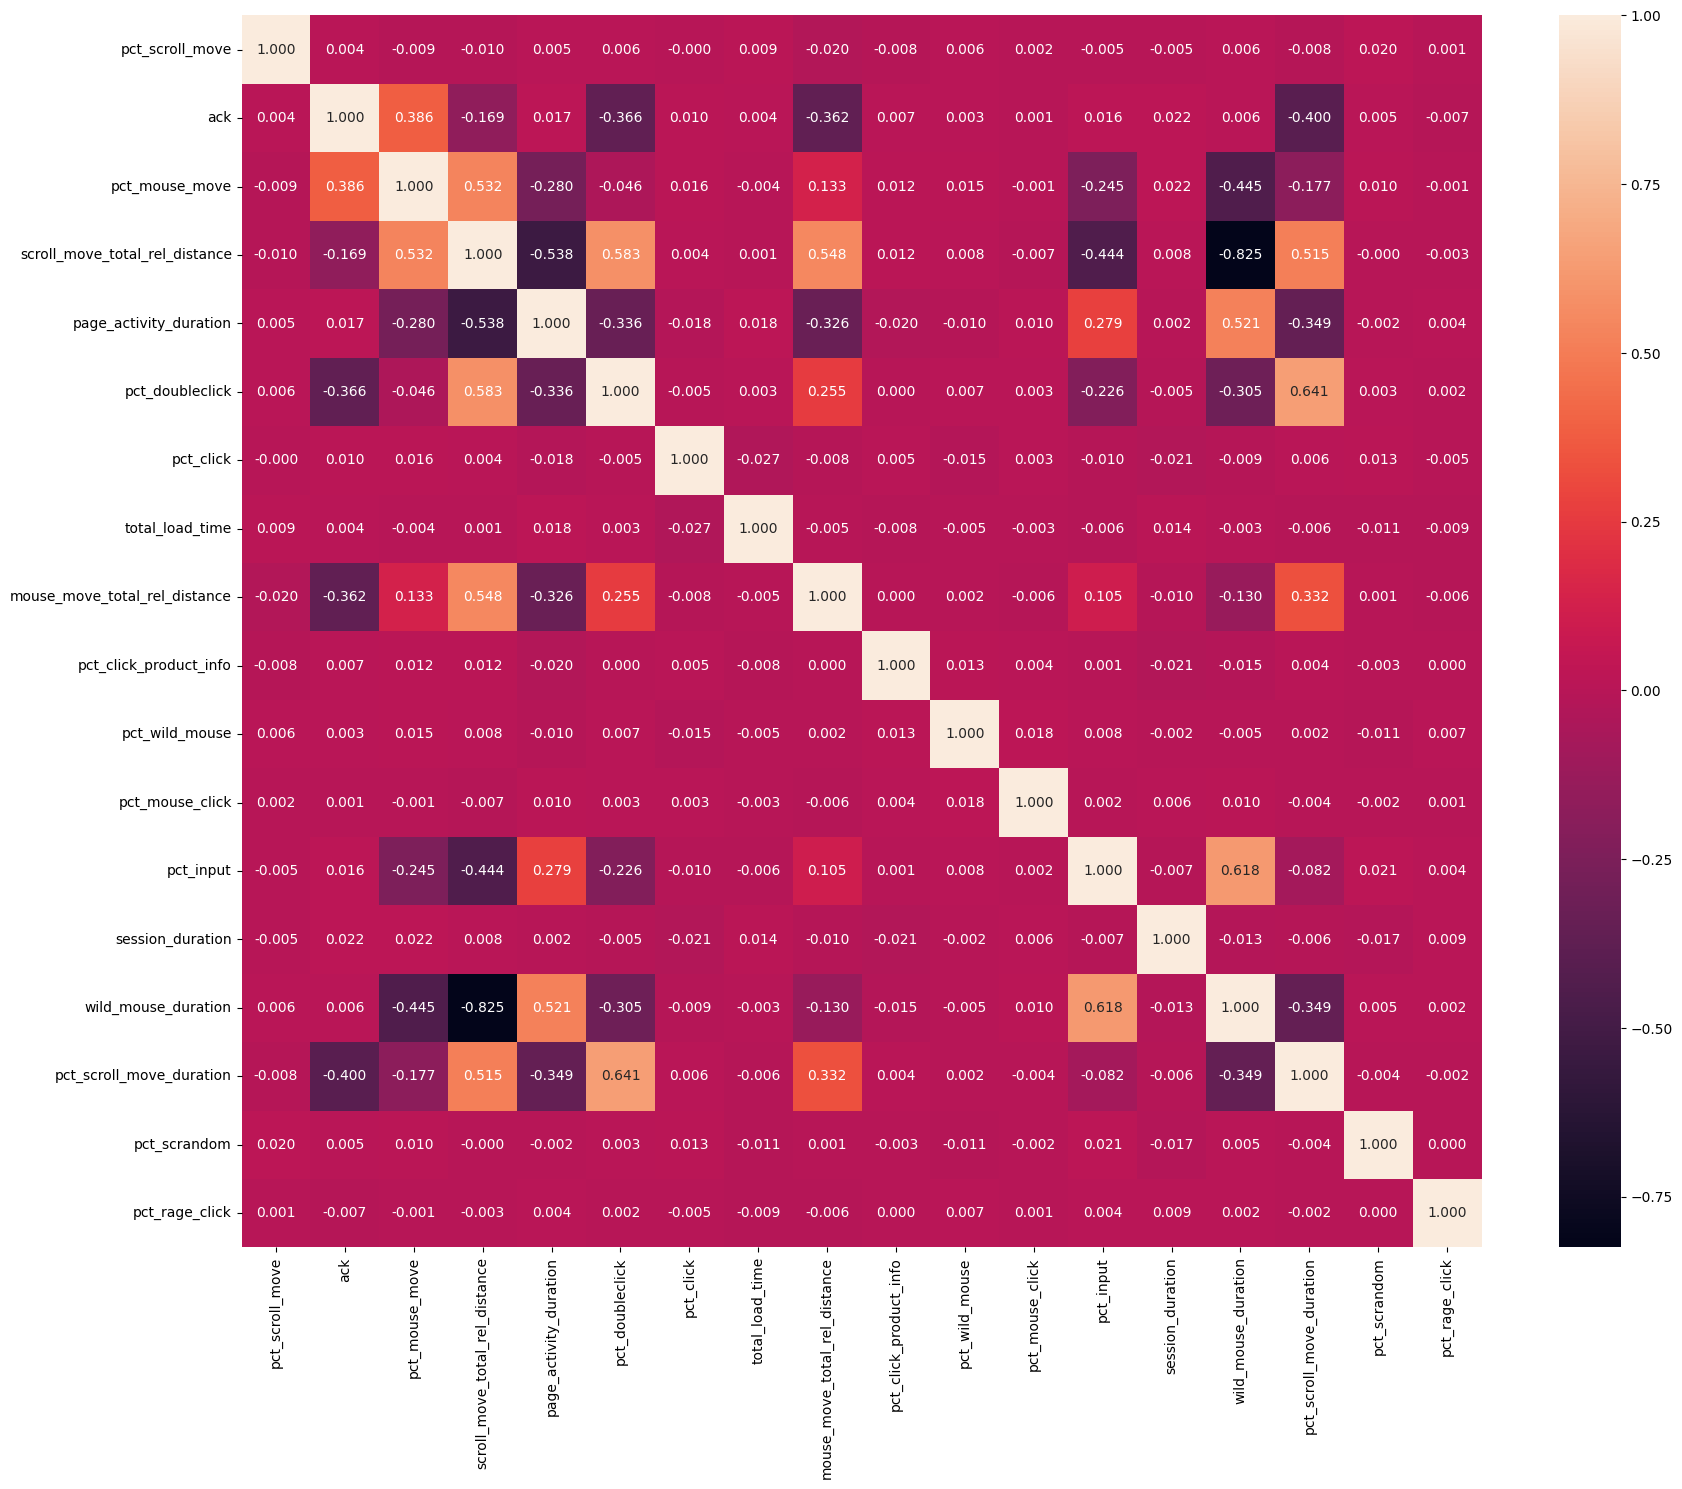

In [318]:
figure, ax = plt.subplots(figsize=(20,16))
sns.heatmap(sessions[train_cols].corr(),ax=ax, annot =True, fmt = ".3f")

Po spracovaní dát:

<Axes: >

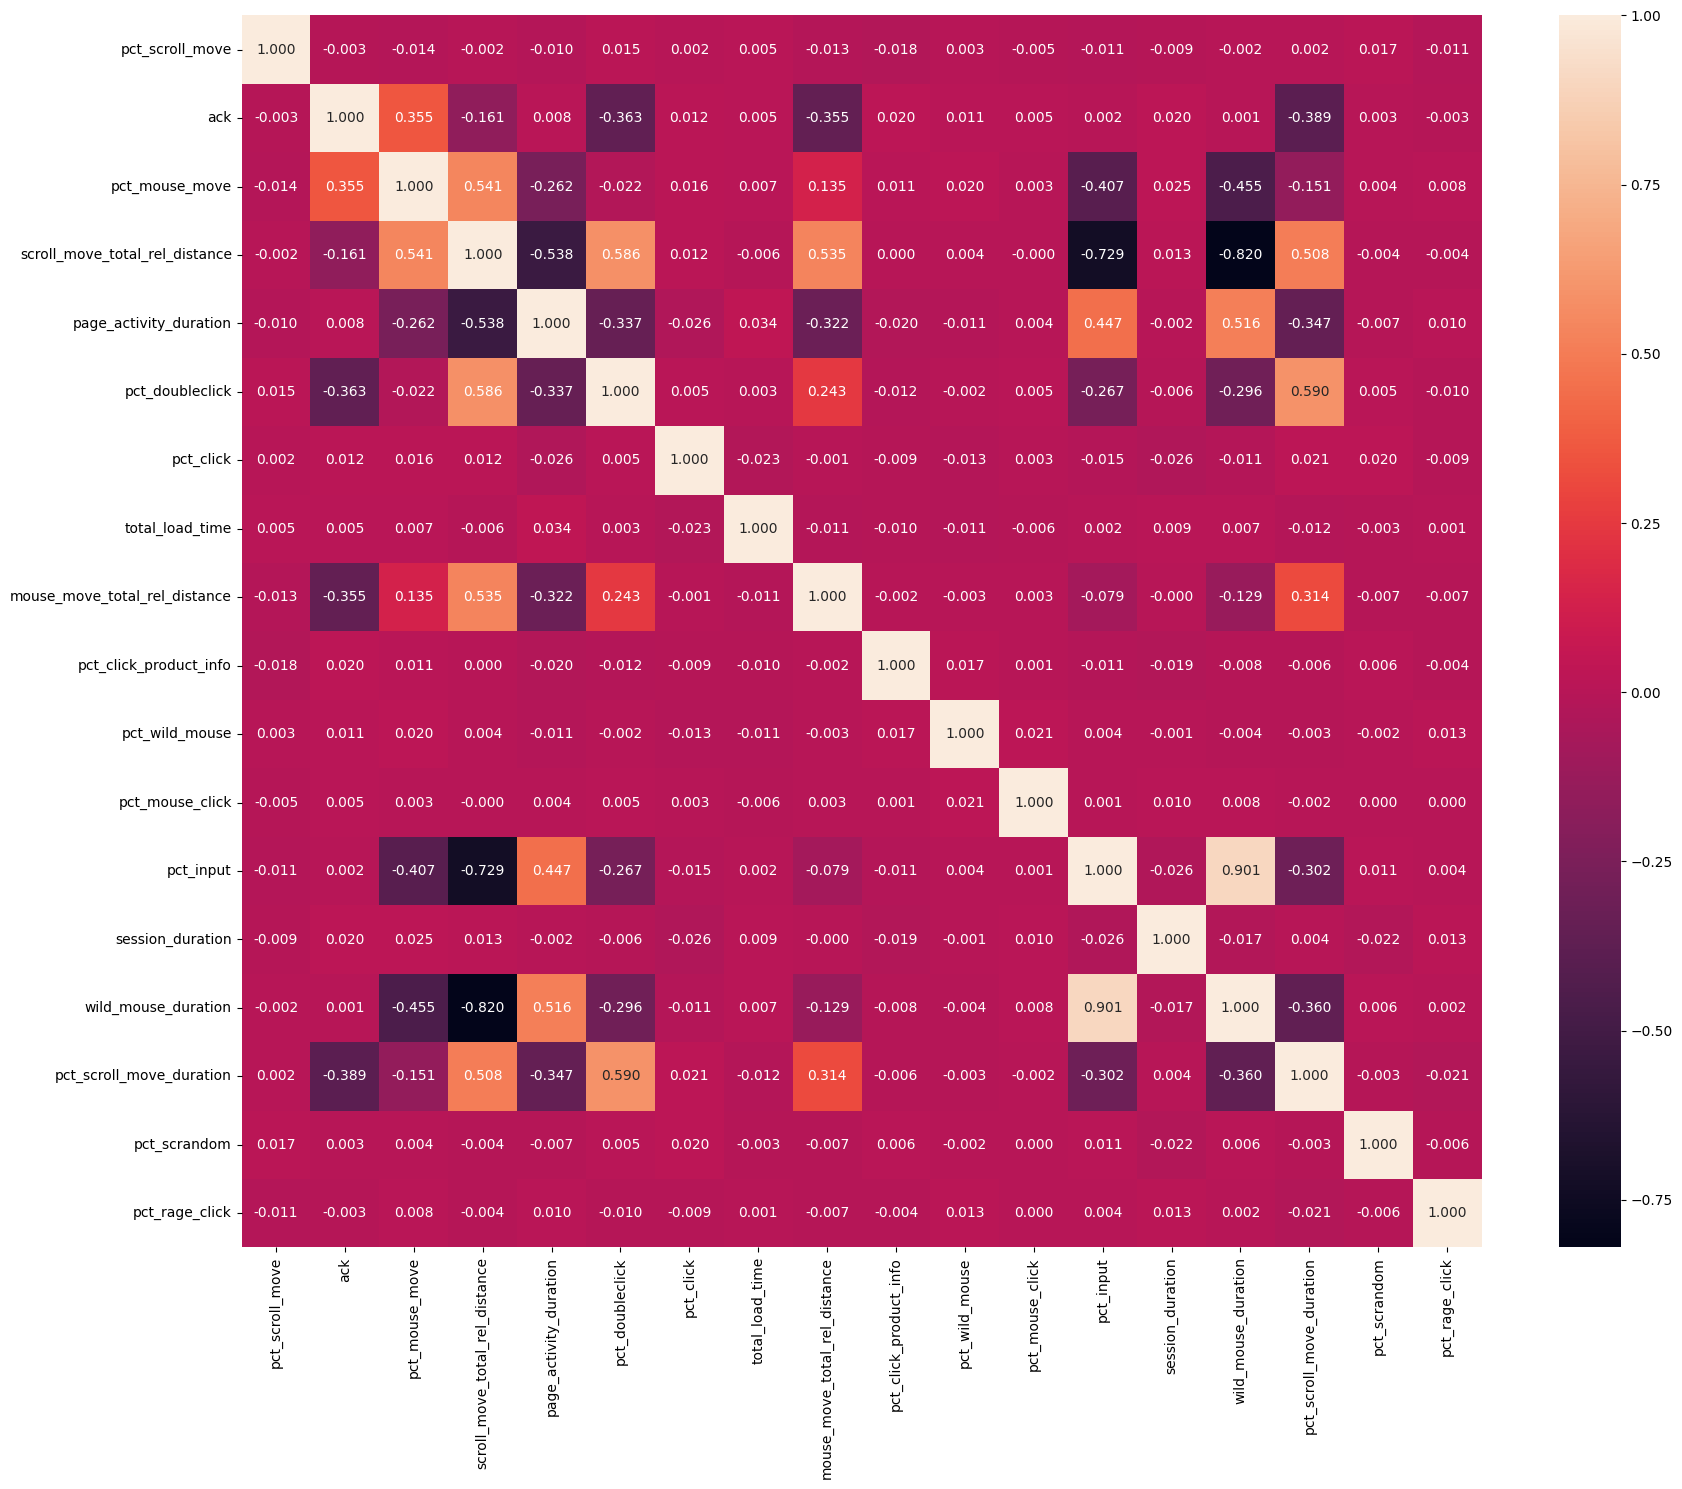

In [319]:
figure, ax = plt.subplots(figsize=(20,16))
sns.heatmap(train_set[train_cols].corr(),ax=ax, annot =True, fmt = ".3f")

Z heatmapy vidíme, že najväčšie korelácie má premenná ACK s týmito atribútmi:
<ol>
<li> pct_mouse_move
<li> scroll_move_total_rel_distance
<li> pct_doubleclick
<li> mouse_move_total_rel_distance
<li> pct_scroll_move_duration
</ol>

Teraz vypíšeme korelácie s ACK a vybranými premennými, zoradíme ich.

In [320]:
correlations = abs(train_set.corr()["ack"])
correlations = correlations.sort_values(ascending=False)
correlations = correlations[1:]

<Axes: >

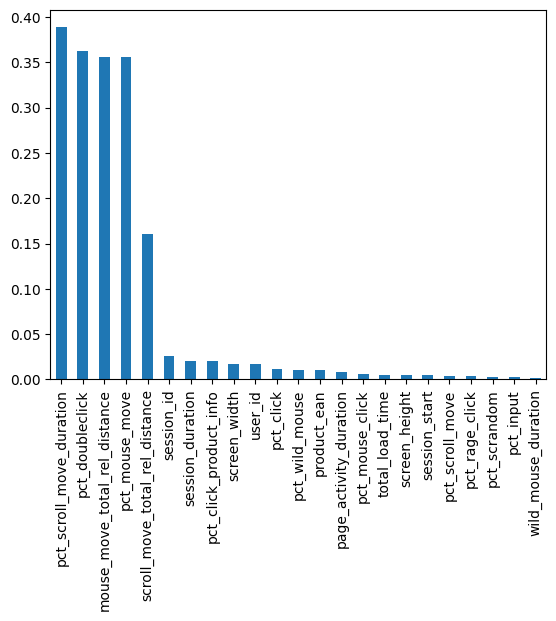

In [321]:
correlations.plot(kind='bar')

Ako vidíme z grafu, najdôležitejšími atribútmi na základe korelácie s ACK sú:
<ol>
<li>pct_scroll_move_duration
<li>pct_doubleclick
<li>pct_mouse_move
<li>mouse_move_total_rel_distance
<li>scroll_move_total_rel_distance
<li>page_activity_duration
<li>wild_mouse_duration
</ol>


Ako druhú metódu použijeme <b>RandomForestRegressor</b>.

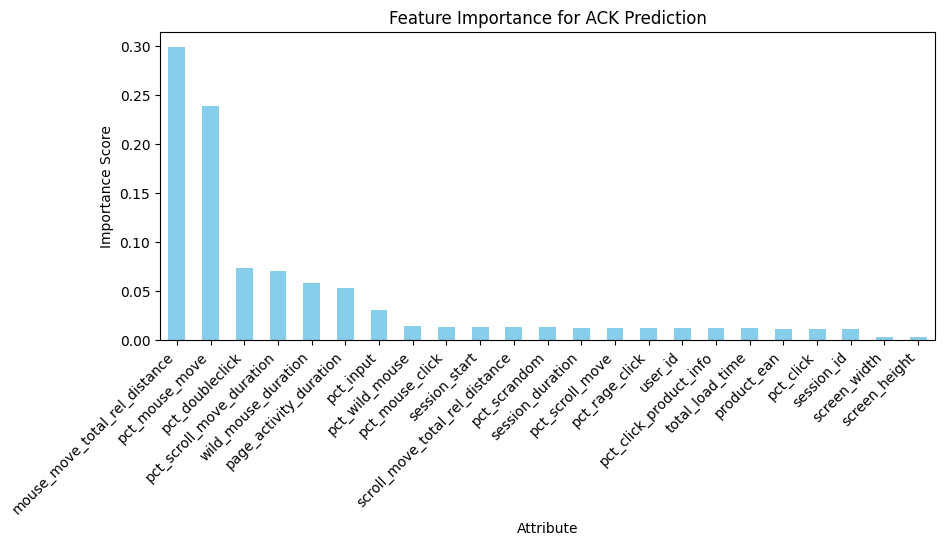

In [322]:
X = train_set.drop('ack', axis=1)
y = train_set["ack"]

RFmodel = RandomForestRegressor()
RFmodel.fit(X, y)

attr_importances = pd.Series(RFmodel.feature_importances_, index=X.columns)
attr_importances = attr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
attr_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for ACK Prediction')
plt.xlabel('Attribute')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.show()

Z výsledneho grafu vieme vybrať niekoľko dôležitých atribútov, ku ktorým sme sa dostali pomocou tejto metódy:

<ol>
<li><b>mouse_move_total_rel_distance</b>
<li><b>pct_mouse_move</b>
<li><b>pct_doubleclick</b>
<li><b>pct_scroll_move_duration</b>
<li>wild_mouse_duration
<li>page_activity_duration
<li>pct_input
</ol>

Zvýraznené sú atribúty, ktoré sa nachádzajú v TOP 5 v obidboch výsledkoch. Zatiaľ nevieme s istototu určiť poradie dôležitosti, tak skúsime ešte jednu metódu, skúsime použiť <b>XGBoost</b>.

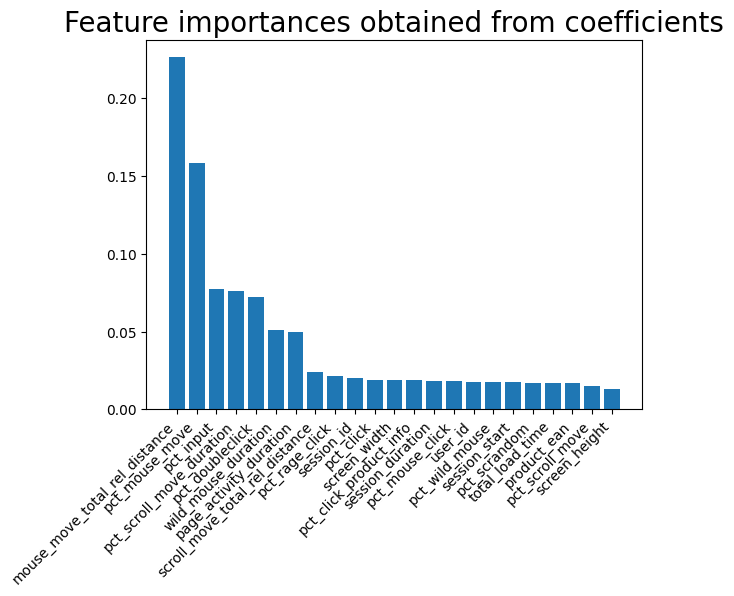

In [323]:
X = train_set.drop('ack', axis=1)
y = train_set['ack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=45, ha='right')
plt.show()

Teraz vieme vybrať tieto atribúty:
<ol>
<li><b>mouse_move_total_rel_distance</b>
<li><b>pct_mouse_move</b>
<li>pct_input
<li><b>pct_scroll_move_duration</b>
<li><b>pct_doubleclick</b>
<li>wild_mouse_duration
<li>page_activity_duration
</ol>

<h4>Dôležité atribúty</h4>
Na zákalde predchádzajúcich informácii, zoradíme atribúty podľa dôležitosti takto:

<ol>
<li><b>mouse_move_total_rel_distance
<li>pct_mouse_move
<li>pct_scroll_move_duration
<li>pct_doubleclick</b>
<li>pct_input
<li>wild_mouse_duration
<li>page_activity_duration
</ol>

Prvé štyri atribúty vyzerajú byť najviac dôležité, ale aj ostatné atribúty maju určitý vplyv na predikovanú premennú, tak zatiaľ uvádzame aj ich.

<h2>Replikovateľnosť predspracovania</h2>
V tejto časti budeme používať Pipeline, pomocou ktorej sa predošlé transformácie a úpravy dát vykonajú jednoduchším spôsobom.

In [324]:
def get_indicies(columns_names, df):
    return [df.columns.get_loc(c) for c in columns_names if c in df]

In [325]:
quantile_transformer = make_column_transformer((QuantileTransformer(output_distribution="normal"), get_indicies(normal, train_set[train_cols])), remainder='passthrough')

In [326]:
power_transformer = make_column_transformer((PowerTransformer(method='yeo-johnson'), get_indicies(normal, train_set[train_cols])),remainder='passthrough')

In [327]:
robust_scaler = make_column_transformer((RobustScaler(),get_indicies(normal+skewed, train_set[train_cols])),remainder='passthrough')

In [328]:
pl = Pipeline(steps=[('1',quantile_transformer),
                     ('2',power_transformer),
                     ('3',robust_scaler),
                     ("4",FunctionTransformer(lambda x: pd.DataFrame(x, columns = train_cols)))], verbose=True)


In [329]:
transformed= pl.fit_transform(train_set[train_cols])
transformed

[Pipeline] ................. (step 1 of 4) Processing 1, total=   0.1s
[Pipeline] ................. (step 2 of 4) Processing 2, total=   0.2s
[Pipeline] ................. (step 3 of 4) Processing 3, total=   0.0s
[Pipeline] ................. (step 4 of 4) Processing 4, total=   0.0s


,pct_scroll_move,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,pct_click_product_info,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,pct_scroll_move_duration,pct_scrandom,pct_rage_click
0,1.614240,-0.041593,1.362003,-1.151061,0.526986,0.686429,0.588744,-0.466821,-0.552035,-0.573830,-1.534474,-0.482952,0.166414,-0.368459,-0.613338,-0.826332,-1.0,0.894114
1,0.573561,-0.605976,0.470977,0.540100,0.815767,-0.045219,-0.185005,-0.362577,0.405213,-0.278847,1.054059,-0.596769,0.268391,-0.146113,0.150281,0.884305,-1.0,0.749451
2,-1.355777,0.122531,1.409302,0.633351,0.044671,0.121313,0.136321,0.290688,-1.069029,0.621625,0.184540,0.285074,-0.565102,-0.906136,0.908342,-0.281474,-1.0,0.145118
3,0.317334,1.144809,1.513812,0.354791,-0.060308,0.346458,-1.335018,0.114279,1.492008,-0.543459,1.280589,0.116979,-0.341111,-0.178681,0.479131,0.705155,-1.0,0.335436
4,1.143591,0.400548,-0.698244,0.257626,-0.830498,0.260813,-0.248792,-0.096921,0.647096,0.686759,-0.467732,-0.064408,0.187322,1.055164,-1.626748,0.971890,0.0,-0.415788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,-0.230498,-0.016576,-0.321418,-0.664569,-1.315943,0.435391,0.357979,-0.265524,0.670307,-0.496780,0.042642,-0.261398,0.442330,-0.427677,-0.135803,-0.128487,0.0,-0.109412
8180,-0.227399,0.205531,-1.531899,0.627677,-0.461125,0.970104,-0.292132,0.530030,0.274537,-0.250814,-0.222136,0.529821,0.139688,-0.152229,-0.975422,0.189936,0.0,-1.306270
8181,0.160075,-1.066165,0.206965,-0.669958,0.583331,-1.095011,-0.475202,-0.167728,0.445799,-0.398813,-0.951198,-0.254243,-0.448540,0.798251,0.000577,-0.670627,-1.0,0.249293
8182,0.391535,-0.052232,-0.620416,0.125467,-0.233012,-0.699572,0.426625,0.070958,0.967698,0.408949,0.321127,0.071278,-0.444008,-0.476482,-0.344827,0.683915,0.0,-0.432166


<h1>Fáza 3</h1>
V tejto časti budeme trénovať model pre predikciu našej predikovanej premennej ACK pomocou strojového učenia. 

<h3>Jednoduchý klasifikátor na základe závislosti v dátach (OneR)</h3>
OneR klasifikátor je jednoduchý preto, lebo na klasifikáciu sa vyberá len jeden atribút.
Na základe informácii, ktoré sme získali v predchadzaujúcej fáze, tak očakávame, že najdôležitejším atribútom bude <i>mouse_move_total_rel_distance</i> alebo <i>pct_mouse_move.</i>
<br>
OneR pracuje s kategorickými dátami, tak si stĺpce, s ktorými pracujeme budeme rozdelovať do kategórii.


In [343]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree, metrics
from sklearn.model_selection import GridSearchCV

In [331]:
train_set_1R = train_set[train_cols].copy()
test_set_1R = test_set[train_cols].copy()
test_set_1R = pl.fit_transform(test_set[train_cols])
test_set_1R['ack'] = test_set['ack'].tolist()
test_set_1R

[Pipeline] ................. (step 1 of 4) Processing 1, total=   0.2s
[Pipeline] ................. (step 2 of 4) Processing 2, total=   0.1s
[Pipeline] ................. (step 3 of 4) Processing 3, total=   0.0s
[Pipeline] ................. (step 4 of 4) Processing 4, total=   0.0s


,pct_scroll_move,ack,pct_mouse_move,scroll_move_total_rel_distance,page_activity_duration,pct_doubleclick,pct_click,total_load_time,mouse_move_total_rel_distance,pct_click_product_info,pct_wild_mouse,pct_mouse_click,pct_input,session_duration,wild_mouse_duration,pct_scroll_move_duration,pct_scrandom,pct_rage_click
0,-1.011120,1.0,-0.921845,0.791799,-0.350939,-0.292652,-0.379976,0.292751,-0.575691,-0.535386,0.830602,0.422231,-0.296274,0.761637,-1.274814,0.122078,0.0,-1.006774
1,-0.516544,0.0,0.053019,0.271839,0.851267,0.026805,-0.680527,-0.166312,0.686257,0.588053,0.080874,-0.156835,-0.597347,-1.513540,-0.531716,-0.514665,-1.0,0.253617
2,0.176958,1.0,-0.008491,0.516328,-0.358776,-0.248936,-0.718367,0.758257,0.990450,0.318613,-0.398407,1.128232,-0.616479,-0.469253,0.007293,-0.609314,0.0,-0.799511
3,0.363393,1.0,0.312180,0.362580,-1.106819,0.764712,0.851373,0.134149,-0.926248,0.098325,-0.520536,0.160494,-0.327331,-0.344770,0.478891,-0.459446,0.0,-0.362683
4,-1.178864,0.0,0.000584,-0.743282,-0.077093,-0.042820,-0.003652,1.132568,1.352859,-0.865033,0.530990,1.382365,-0.752707,-0.814721,-0.154417,0.982825,-1.0,-0.893235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.197461,1.0,0.096069,-0.604213,0.107355,-0.963810,0.504255,-0.371393,0.469281,-1.549359,0.187103,-0.217513,0.009905,-0.066034,-0.151733,-1.066980,0.0,0.377602
2724,1.306226,1.0,-0.636985,-0.617246,-0.808312,0.384282,-0.152363,-0.025043,-0.395974,0.239441,-0.885739,-0.036659,0.213502,-0.410388,-1.049228,1.252465,0.0,-0.396746
2725,0.876456,0.0,-0.099902,1.356732,1.179565,-0.075429,0.642730,-0.541560,0.845439,0.540926,0.240233,-0.269781,0.133873,0.514970,-0.173337,-1.342214,-1.0,0.848776
2726,0.075573,1.0,1.028142,0.361006,-0.727645,-1.196526,0.991033,0.218965,-0.483548,0.303733,-0.473798,0.279024,-0.263349,0.557412,0.916945,0.499817,0.0,-0.082166


In [332]:
def set_rule(data, col):
    split_point = (data[col][data['ack'] == 0].mean() + data[col][data['ack'] == 1].mean())/2
    group = data[data[col] > split_point].groupby('ack').size()
    if group[0] > group[1]:
        left = 1
        right = 0
    else:
        left = 0
        right = 1
        
    return split_point, left, right

def OneR(data, col, rule):
    data.loc[data[col] <= rule[0], 'temp'] = rule[1]
    data.loc[data[col] > rule[0], 'temp'] = rule[2]

    accuracy = accuracy_score(data['ack'], data['temp'])
    recall = recall_score(data['ack'], data['temp'])
    precision = precision_score(data['ack'], data['temp'])

    result = (accuracy + recall + precision)/3

    data.drop('temp', axis = 1, inplace=True)

    return result, accuracy, recall, precision


In [333]:
best_value = 0

for col in train_set_1R.columns:

    if (col == 'ack'):
        continue

    rule = set_rule(train_set_1R, col)
    metrics = OneR(train_set_1R, col, rule)

    print('Attribute: ', col, '\tvalue: ', metrics[0])
    
    if (metrics[0] > best_value):
        best_value = metrics[0]
        best_attr = col
        best_metrics = metrics

print('\nBest attribute: ', best_attr, " with value: ", best_value)
print('Accuracy: ', best_metrics[1])
print('Recall: ', best_metrics[2])
print('Precision: ', best_metrics[3])

Attribute:  pct_scroll_move 	value:  0.5153379393261506


Attribute:  pct_mouse_move 	value:  0.6701130431132958
Attribute:  scroll_move_total_rel_distance 	value:  0.5905707789495719
Attribute:  page_activity_duration 	value:  0.5450929785418613
Attribute:  pct_doubleclick 	value:  0.6627827612670697
Attribute:  pct_click 	value:  0.5307597676793955
Attribute:  total_load_time 	value:  0.5223113382873193
Attribute:  mouse_move_total_rel_distance 	value:  0.6695953684549419
Attribute:  pct_click_product_info 	value:  0.5196492703222201
Attribute:  pct_wild_mouse 	value:  0.5224157910758233
Attribute:  pct_mouse_click 	value:  0.5218006086916526
Attribute:  pct_input 	value:  0.538318113772592
Attribute:  session_duration 	value:  0.5253153344799972
Attribute:  wild_mouse_duration 	value:  0.5408029453550315
Attribute:  pct_scroll_move_duration 	value:  0.6434548095497387
Attribute:  pct_scrandom 	value:  0.5162117201314356
Attribute:  pct_rage_click 	value:  0.5122681457990981

Best attribute:  pct_mouse_move  with value:  0.6701130431132958


Ako môžeme vidieť, za najlepší atribút pre tento klasifikátor môžeme pokladať <b>pct_mouse_move</b> (value ~0.67), ako sme aj predpokladali. Druhý kandidát - mouse_move_total_rel_distance je na druhom mieste (value ~0.66) a na treťom je pct_doubleclick (value ~0.65). Čo sa celkom zhoduje s dôležitými atribútmi, ku ktorým sme sa dostali v druhej fáze.

<h4>Rozhodovanie na základe viacerých atribútov</h4>
Ako sme zistili v predošlom kroku, najlepším stĺpcom pre nás je pct_mouse_move  (PMM) a druhým najlepším je mouse_move_total_rel_distance (MMTRL). Tak skusíme aplikovať algoritmus pre tieto premenne. <br><br>
<b>Pravidlo: </b>
Ak PMM > 0 a MMTRL < 0 budeme zoraďovať do kategórie 1, ostatné prípady do 0. 


In [334]:

def set_rule2(data):
        temp = data[data['ack'].notna()]

        rules = dict()
        rules["total"] = temp['ack'].count()

        rules["tp"] = len(temp.loc[((temp.pct_mouse_move > 0) & (temp.mouse_move_total_rel_distance < 0)) & (temp['ack'] == 1.0), 'ack'])
        rules["tn"] = len(temp.loc[((temp.pct_mouse_move <=0) | (temp.mouse_move_total_rel_distance >= 0)) & (temp['ack'] == 0.0), 'ack'])

        rules["fp"] = len(temp.loc[((temp.pct_mouse_move > 0) & (temp.mouse_move_total_rel_distance < 0)) & (temp['ack'] == 0), 'ack'])
        
        rules["fn"] = len(temp.loc[((temp.pct_mouse_move <= 0) | (temp.mouse_move_total_rel_distance >= 0)) & (temp['ack'] == 1.0), 'ack'])

        print("\nTotal: ", rules["total"])
        print("accuracy:  ",(rules["tp"] + rules["tn"]) / rules["total"])

        print("precision:  ", rules["tp"] / (rules["fp"] + rules["tp"]) + 1)
        print("recall:  ", rules["tp"] / (rules["fn"] + rules["tp"]))

        rules["values"] = np.array((temp.apply(
        lambda row: 1.0 if ((row.pct_mouse_move > 0) and (row.mouse_move_total_rel_distance < 0)) else 0.0,axis=1)).values.tolist())
        rules["cr"] = classification_report(temp['ack'], rules["values"], target_names=["0", "1"])
        print(rules["cr"])

In [335]:
set_rule2(train_set_1R)


Total:  8184
accuracy:   0.6652003910068426
precision:   1.9459734964322122
recall:   0.4133630289532294


              precision    recall  f1-score   support

           0       0.58      0.97      0.72      3694
           1       0.95      0.41      0.58      4490

    accuracy                           0.67      8184
   macro avg       0.76      0.69      0.65      8184
weighted avg       0.78      0.67      0.64      8184



In [336]:
set_rule2(test_set_1R)


Total:  2728
accuracy:   0.3980938416422287
precision:   1.4005847953216375
recall:   0.18193891102257637
              precision    recall  f1-score   support

           0       0.40      0.66      0.50      1222
           1       0.40      0.18      0.25      1506

    accuracy                           0.40      2728
   macro avg       0.40      0.42      0.37      2728
weighted avg       0.40      0.40      0.36      2728



Pri klasifikátore s jedným atribútom sme mali lepšie výsledky. Vo výstupe vidíme, že accuracy, recall a precision sú pri rozhodovaní na základe viacerých atribútov nižšie (len trochu), aj keď sme zobrali dva najlepšie atribúty podľa prvého algoritmu. 

<h2>Trénovanie a vyhodnotenie klasifikátorov strojového učenia </h2>
V tomto kroku sme sa rozhodli skúsiť na trénovanie DecisionTreeClassifier

In [337]:

training_labels = train_set['ack']
validation_labels = test_set['ack']

columns = ['ack']

train_class = train_set[train_cols] 
test_class = test_set[train_cols]

train_class = train_set.drop(columns,  axis=1)
test_class = test_set.drop(columns, axis=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_class, training_labels)
tree_predict = clf.predict(test_class)

print("Accuracy:", accuracy_score(validation_labels, tree_predict))

Accuracy: 0.46224340175953077


In [338]:
print(classification_report(validation_labels, tree_predict, target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.44      0.75      0.56      1222
           1       0.53      0.23      0.32      1506

    accuracy                           0.46      2728
   macro avg       0.49      0.49      0.44      2728
weighted avg       0.49      0.46      0.42      2728



Text(113.9222222222222, 0.5, 'predicted label')

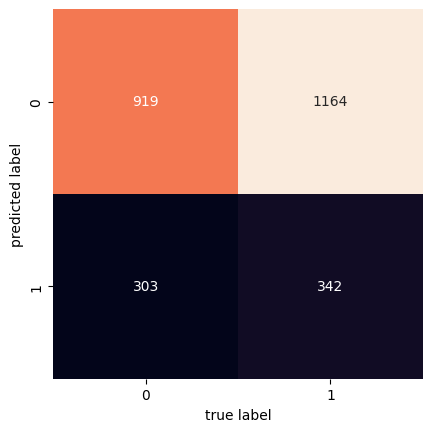

In [339]:
mat = confusion_matrix(validation_labels, tree_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

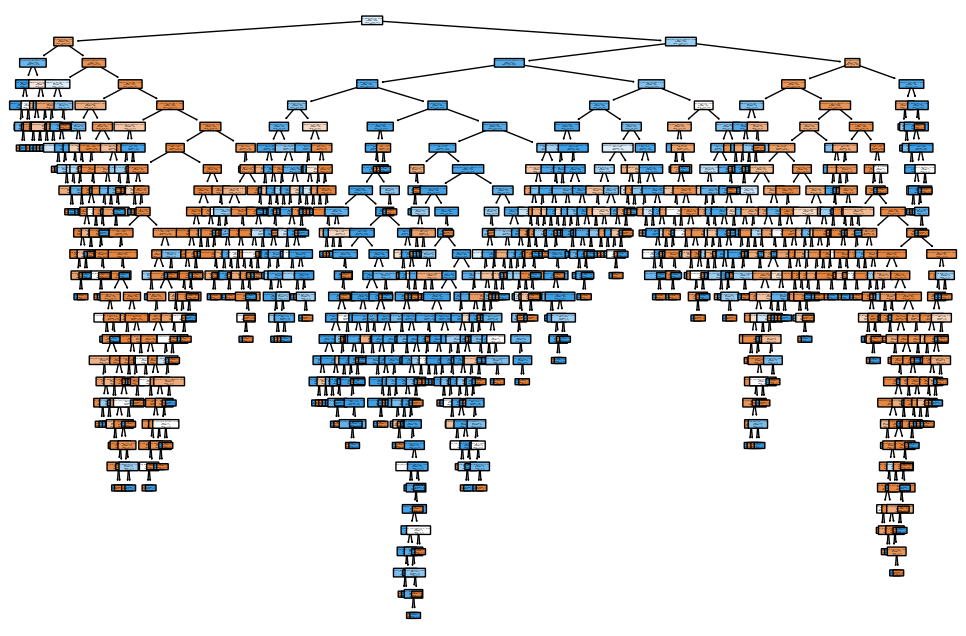

In [340]:
tree_rules = export_text(clf, feature_names=list(test_class.columns))
#print(tree_rules)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, feature_names=list(test_class.columns), class_names=["1", "0"], filled=True, rounded=True, ax=ax)
plt.show()

In [341]:
from sklearn.model_selection import train_test_split


gnb = GaussianNB()
gnb.fit(train_class, training_labels)
gauss_predict = gnb.predict(test_class)

accuracy = accuracy_score(validation_labels, gauss_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.5520527859237536


Ako môžeme vidieť, použitie Gaussian Naive Bayes má na našich dátach lepšiu accuracy ako použitie DecisionTreeClassifier. <br>
DecisionTreeClassifier má presnosť 0.5340909090909091 a Gaussian Naive Bayes má presnosť 0.5450879765395894.

Porovnáme výsledok z nášho OneR algoritmu s výsledkom DecisionTreeClassifier:<br>
OneR s jedným atribútom má presnosť, 0.6564027370478983 čo je viac ako DecisionTreeClassifier aj Naive Gaussian Bayes. Trénovanie na viacerých atribútoch má presnosť 0.6620234604105572, čo je viac aj ako doteraz najlepší OneR.

In [342]:
tree_acc = accuracy_score(validation_labels, tree_predict)
tree_precis = precision_score(validation_labels, tree_predict)
tree_recall = recall_score(validation_labels, tree_predict)

gauss_acc = accuracy_score(validation_labels, gauss_predict)
gauss_precis = precision_score(validation_labels, gauss_predict)
gauss_recall = recall_score(validation_labels, gauss_predict)

print("Tree stats:")
print("Accuracy: ", tree_acc)
print("Precision: ", tree_precis)
print("Recall", tree_recall)
print("\n")
print("Bayes stats:")
print("Accuracy: ", gauss_acc)
print("Precision: ", gauss_precis)
print("Recall", gauss_recall)

Tree stats:
Accuracy:  0.46224340175953077
Precision:  0.5302325581395348
Recall 0.22709163346613545


Bayes stats:
Accuracy:  0.5520527859237536
Precision:  0.5520527859237536
Recall 1.0


<h2>Optimalizácia alias hyperparameter tuning</h2>

Hyperparametre sú premenné, ktoré môžeme konfigurovať a následne s nimi experimentovať a sledovať vplyv na model. Pomocou spravného nastavenia hyperparametrov vieme zlepšiť výsledky nášho klasifikátora. Použijeme GridSearchCV
<h5>Hyperparametre</h5>
<ul>
<li> <b>Max-depth</b> = maxim8lna hĺbka rozhodovacieho stromu
<li> <b>Criterion</b> = určuje kvalitu rozdelenia, môže byť "gini" alebo "entropy"
<li> <b>Splitter</b> = v uzloch stromu môžeme zvoliť rôznu stratégiu rozhodovania, "random" alebo "best"
</ul>

In [356]:
parameters = {'criterion': ('gini','entropy'), 'splitter': ('best','random'), 'max_depth': range(1,20)}

In [357]:
grid = GridSearchCV(clf, parameters,cv=12,scoring="accuracy")
result = grid.fit(train_class, training_labels)

Nižšie je uvedená najlepšia kombinácia parametrov.

In [358]:
params = grid.best_params_
params

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [359]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042985,0.008735,0.001074,0.001172,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.722874,0.712610,0.702346,0.692082,0.721408,0.728739,0.697947,0.717009,0.695015,0.721408,0.692082,0.687683,0.707600,0.013942,71
1,0.004810,0.006181,0.003802,0.005371,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.653959,0.712610,0.558651,0.592375,0.643695,0.692082,0.695015,0.633431,0.617302,0.623167,0.646628,0.661290,0.644184,0.042066,75
2,0.079825,0.005987,0.000736,0.001197,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.860704,0.847507,0.844575,0.860704,0.857771,0.859238,0.818182,0.840176,0.822581,0.865103,0.831378,0.828446,0.844697,0.015741,61
3,0.009104,0.002929,0.002090,0.001381,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.719941,0.673021,0.718475,0.696481,0.637830,0.579179,0.686217,0.686217,0.703812,0.614370,0.637830,0.668622,0.668500,0.041444,74
4,0.107239,0.010316,0.003470,0.005024,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.873900,0.868035,0.873900,0.878299,0.870968,0.875367,0.835777,0.851906,0.835777,0.872434,0.847507,0.846041,0.860826,0.015488,44


In [360]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [361]:
clf = grid.best_estimator_
clf = clf.fit(train_class,training_labels)
predicted=clf.predict(test_class)
print("Accuracy: ", metrics.accuracy_score(validation_labels, predicted))

Accuracy:  0.4479472140762463


Skúsime ešte parameter max_features a uvidíme či bude nejaký rozdiel. Keďže v predošlom ktorku najlepšou hĺbkou sa preukázala hĺbka 8, tak zmenšíme range pre max-depth.

In [ ]:
parameters = {'criterion': ('gini','entropy'), 'splitter': ('best','random'), 'max_depth': range(1,10), 'max_features': range(1,10)}

In [ ]:
grid = GridSearchCV(clf, parameters,cv=10,scoring="accuracy")
result = grid.fit(train_class, training_labels)